# Final Project for GA's Data Sciense PART TIME program

### Predecting Housing Prices in Ames, Iowa.

##### Aws Bassyoni
##### Instructor: James Larkin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

#### We will start the project with an EDA and perform any needed cleaning

In [2]:
# Loading the CSV file into a Pandas Dataframe.
ames = pd.read_csv('./data/train.csv')
ames.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
columns = ames.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
ames.shape

(1460, 81)

In [5]:
ames.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
ames.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
ames.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
list(ames.select_dtypes(include=['object']))

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

###### We have 43 non-numric features in ames and 38 numric features.

###### Checking for missing values:

* Bar Plot of missing values per feature

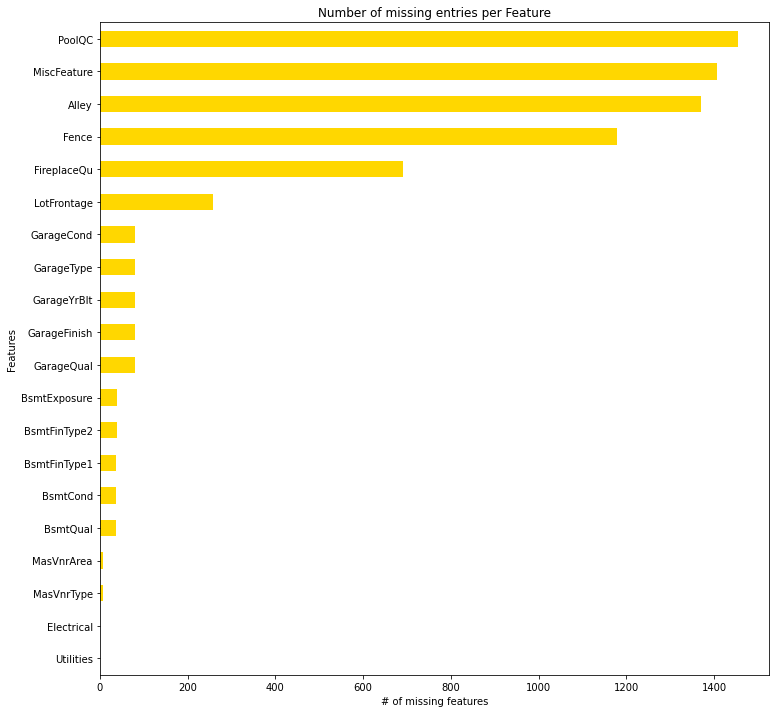

In [10]:
ames.isnull().sum().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,12),color='gold')
plt.xlabel('# of missing features')
plt.ylabel('Features')
plt.title('Number of missing entries per Feature');

* Table showing the number of missing values in each column

In [11]:
# For a better view
missing_valus_total = ames.isnull().sum().sort_values(ascending=False)
Percentage_missing = ((ames.isnull().sum()) / (ames.isnull().count())).sort_values(ascending=False).mul(100)
#Table to view percentage of missing values compared to total missing values
missing_data = pd.concat([missing_valus_total, Percentage_missing], axis=1,keys=['Total Missing', 'Percentage'])
missing_data.head(25)
#This code snippit was adopted mostly from class material

Total Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageCond               81    5.547945
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
MasVnrType                8    0.547945
Electrical                1    0.068493
Utilities                 0    0.000000
YearRemodAdd              0    0.000000
MSSubClass                0    0.000000
Foundation                0    0.000000
ExterCond                 0    0.000000
ExterQual                 0    0.000000

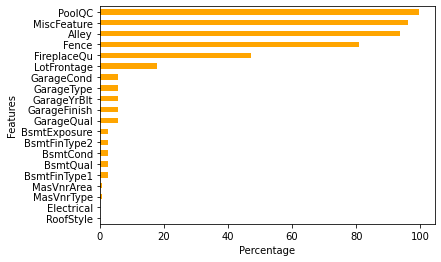

In [12]:
missing_data['Percentage'].sort_values(ascending=True).tail(20).plot(kind='barh',color='orange')
plt.xlabel('Percentage')
plt.ylabel('Features');

* 19 of our data's 81 features contain missing values
* PoolQC, MiscFeatures, Alley, Fence, FireplaceQu, LotFrontage etc.. have about > 10% missing values, thus
* we will consider dropping them from our model at a later stage

* #### Plot to show the Sale Prices vs Neighborhoods

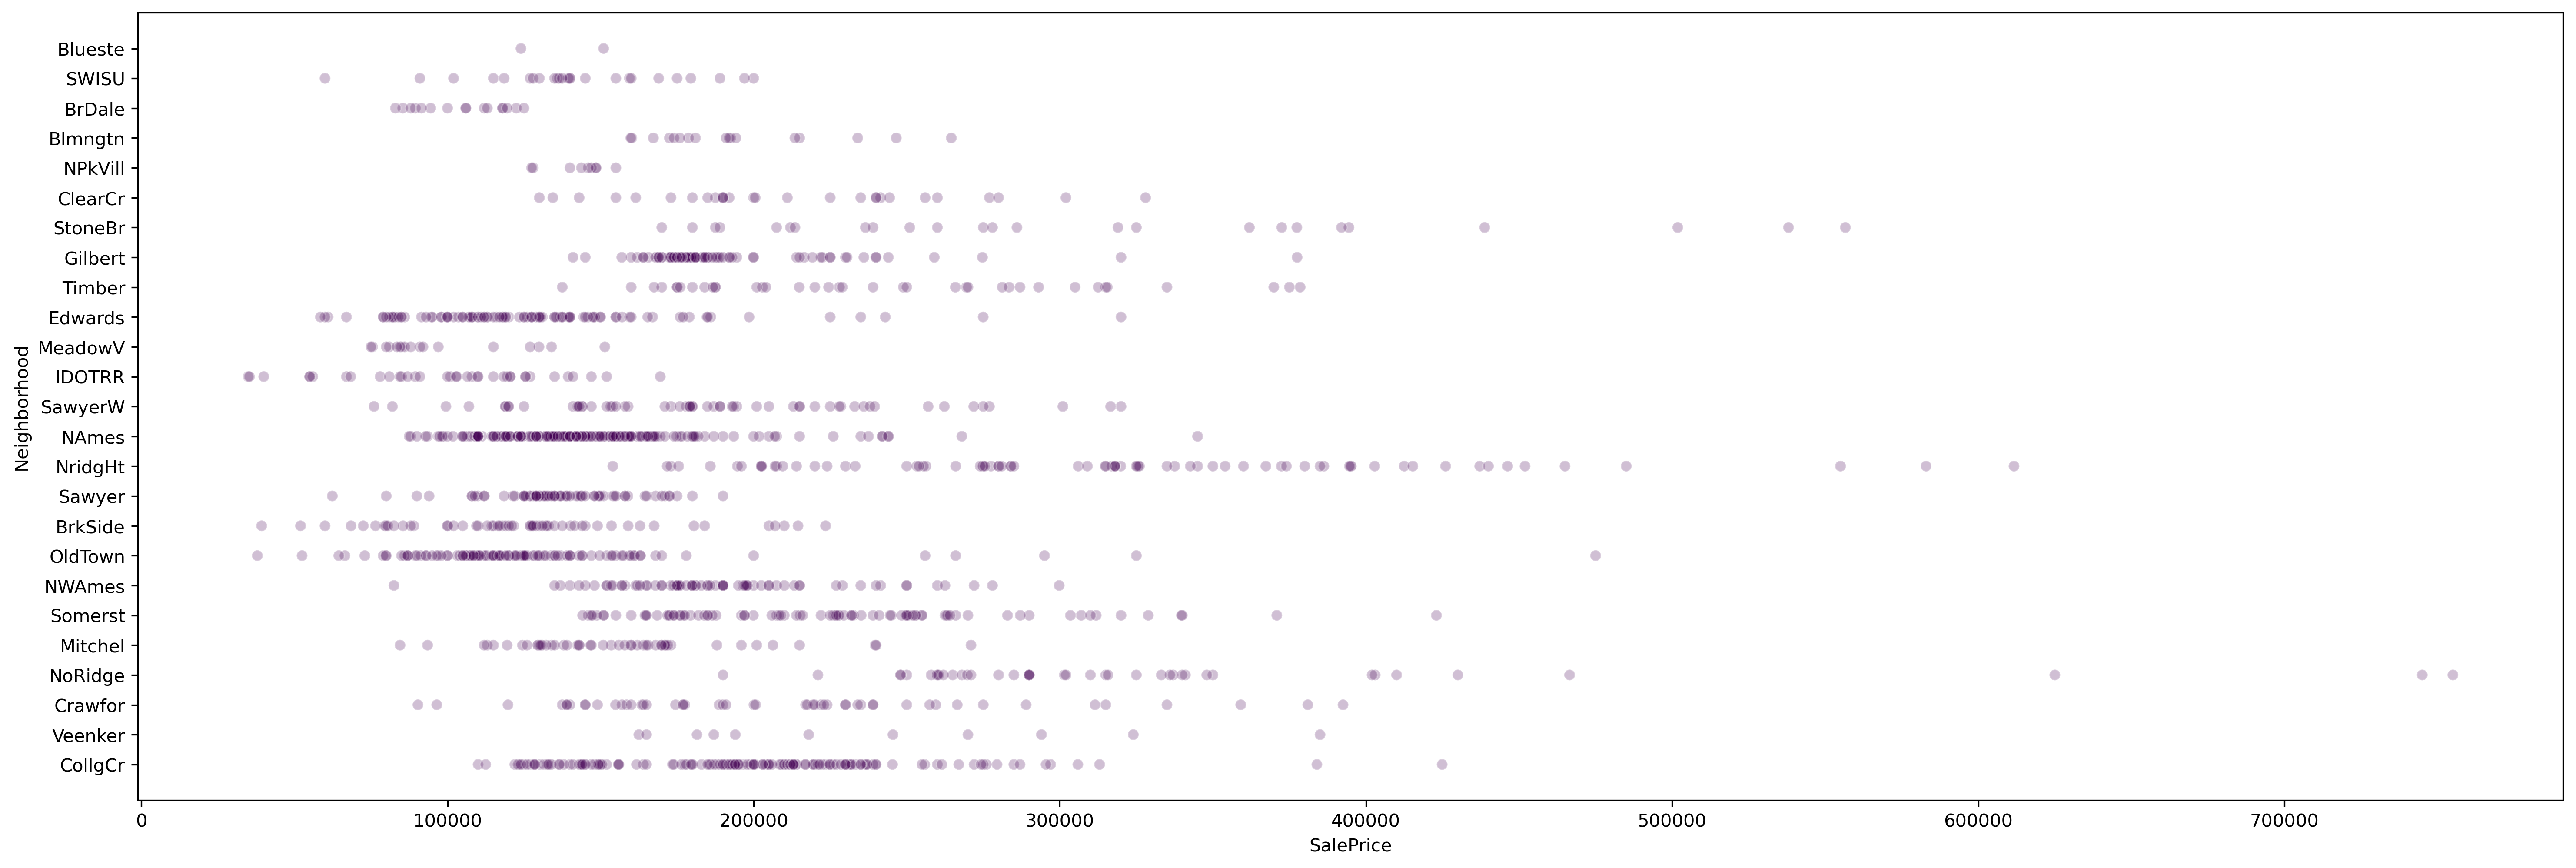

In [13]:
fig = plt.figure(figsize=(24,8),dpi=300)
sns.scatterplot(ames.SalePrice,ames.Neighborhood,hue=True,palette='viridis',alpha=0.25,legend=None);

* #### Roughly most houses fall between 100k to 250k price range
* #### A few districts have houses priced at more 250k for example.


### Lets filter houese with prices of above 300k and see which neighborhood they belong too!

In [14]:
houses_above300k = ames[ames['SalePrice'] > 300000]\
[['Neighborhood','SalePrice']].sort_values(by='SalePrice',ascending=False)
houses_above300k.head(10)

Neighborhood  SalePrice
691       NoRidge     755000
1182      NoRidge     745000
1169      NoRidge     625000
898       NridgHt     611657
803       NridgHt     582933
1046      StoneBr     556581
440       NridgHt     555000
769       StoneBr     538000
178       StoneBr     501837
798       NridgHt     485000

In [15]:
houses_above300k.Neighborhood.value_counts()

NridgHt    42
NoRidge    21
StoneBr    11
Somerst    10
Timber      8
Crawfor     6
CollgCr     4
SawyerW     3
OldTown     2
Veenker     2
Gilbert     2
ClearCr     2
NAmes       1
Edwards     1
Name: Neighborhood, dtype: int64

* #### We can assume that residents of Northridge Heights, Northridge and Stone Brook are of high income

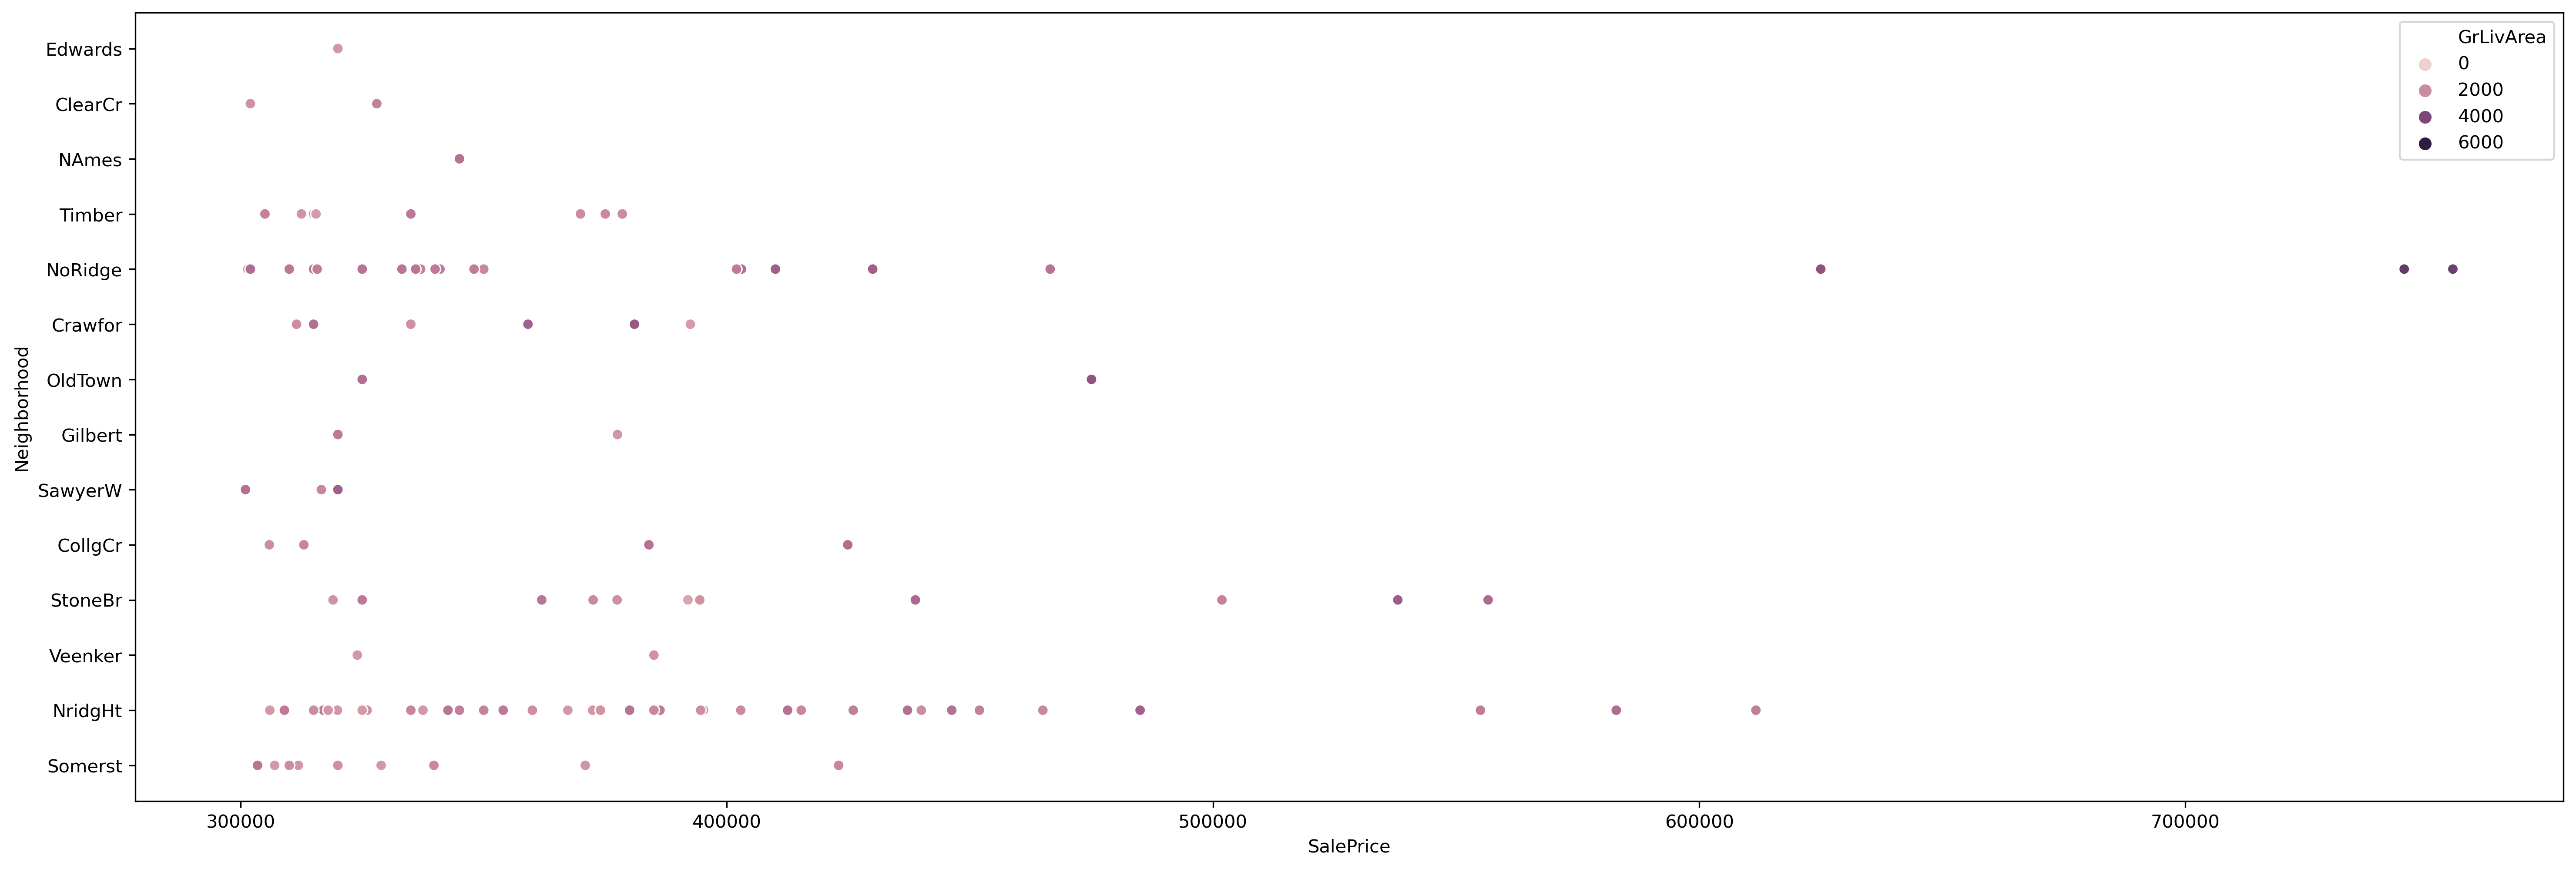

In [16]:
fig = plt.figure(figsize=(24,8),dpi=300)
sns.scatterplot(houses_above300k.SalePrice,houses_above300k.Neighborhood,\
hue=ames.GrLivArea);

#Where houses above 300k price tag are located with their living areas in square feet

* #### Lets plot some features against the sale price.

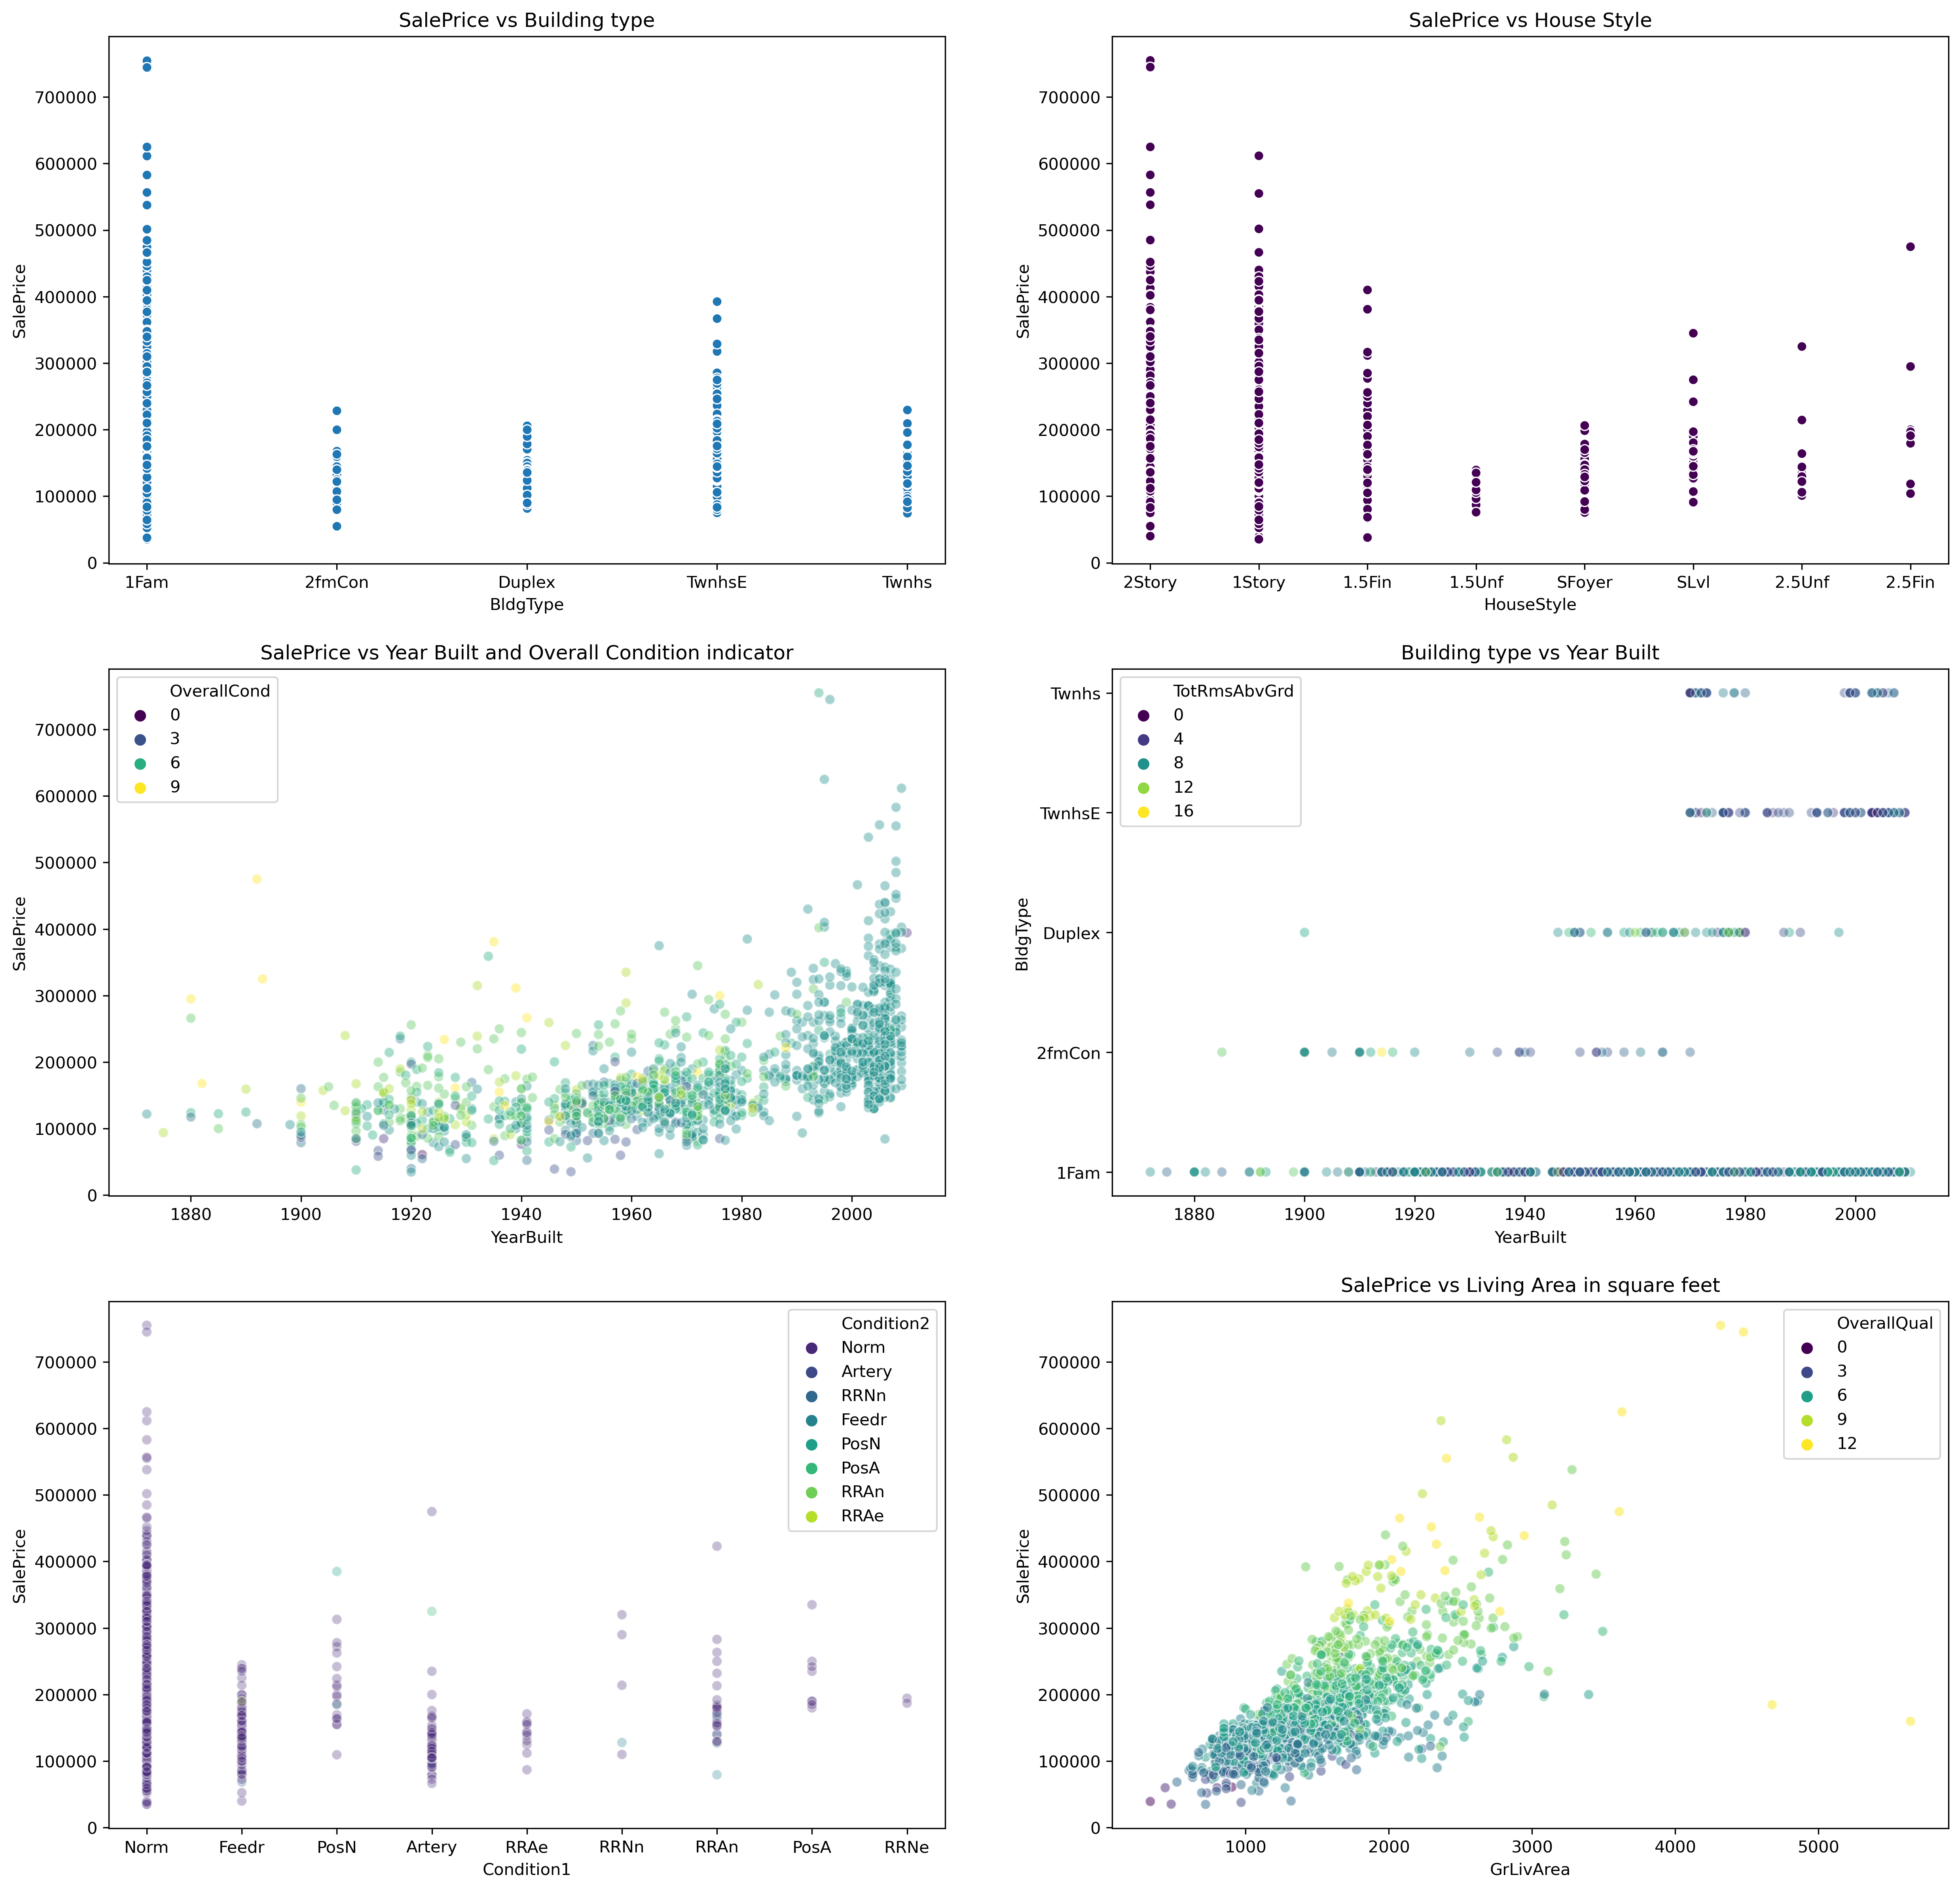

In [17]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax1 = plt.subplot(3, 2, 1)
sns.scatterplot(ames.BldgType,ames.SalePrice,\
palette="viridis");
plt.title('SalePrice vs Building type')
#TotRmsAbvGrd: Total rooms above ground (does not include bathrooms)

ax2 = plt.subplot(3, 2, 2)

sns.scatterplot(ames.HouseStyle,ames.SalePrice,\
hue=True,palette='viridis',legend=None);
plt.title('SalePrice vs House Style')
    
ax3 = plt.subplot(3, 2, 3)

sns.scatterplot(ames.YearBuilt,ames.SalePrice,\
hue=ames.OverallCond,palette='viridis',alpha=0.4);
plt.title('SalePrice vs Year Built and Overall Condition indicator')

ax4 = plt.subplot(3, 2, 4)

sns.scatterplot(ames.YearBuilt,ames.BldgType,\
hue=ames.TotRmsAbvGrd,palette='viridis',alpha=0.4);
plt.title('Building type vs Year Built')

ax5 = plt.subplot(3, 2, 5)

sns.scatterplot(ames.Condition1,ames.SalePrice,\
hue=ames.Condition2,palette='viridis',alpha=0.3);

ax6 = plt.subplot(3, 2, 6)

sns.scatterplot(ames.GrLivArea,ames.SalePrice,\
hue=ames.OverallQual,palette='viridis',alpha=0.5);
plt.title('SalePrice vs Living Area in square feet');
#GrLivArea: Above ground living area in square feet


* #### Remarks
* #### ax1: Most houses above the 300k mark are a single family build
* #### ax3: Most houses are built between 1960s and 2000s
* #### ax4: most houses built over the years are intended for one family 


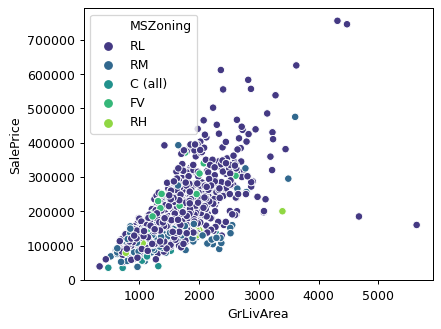

In [18]:
fig = plt.figure(figsize=(5,4), dpi=90)

#MSZoning: Identifies the general zoning classification of the sale.
       #A	Agriculture
       #C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
       #RH	Residential High Density
       #RL	Residential Low Density
       #RP	Residential Low Density Park 
       #RM	Residential Medium Density
sns.scatterplot(ames.GrLivArea, ames.SalePrice, hue=ames.MSZoning,palette='viridis');
#Most houses in ames fall in 'Residential Low Density' areas

* #### Most houses above the 300k mark are a single family build

In [19]:
#ames.hist(figsize = (20,20))

#### Let's look at some features histograms and box plots

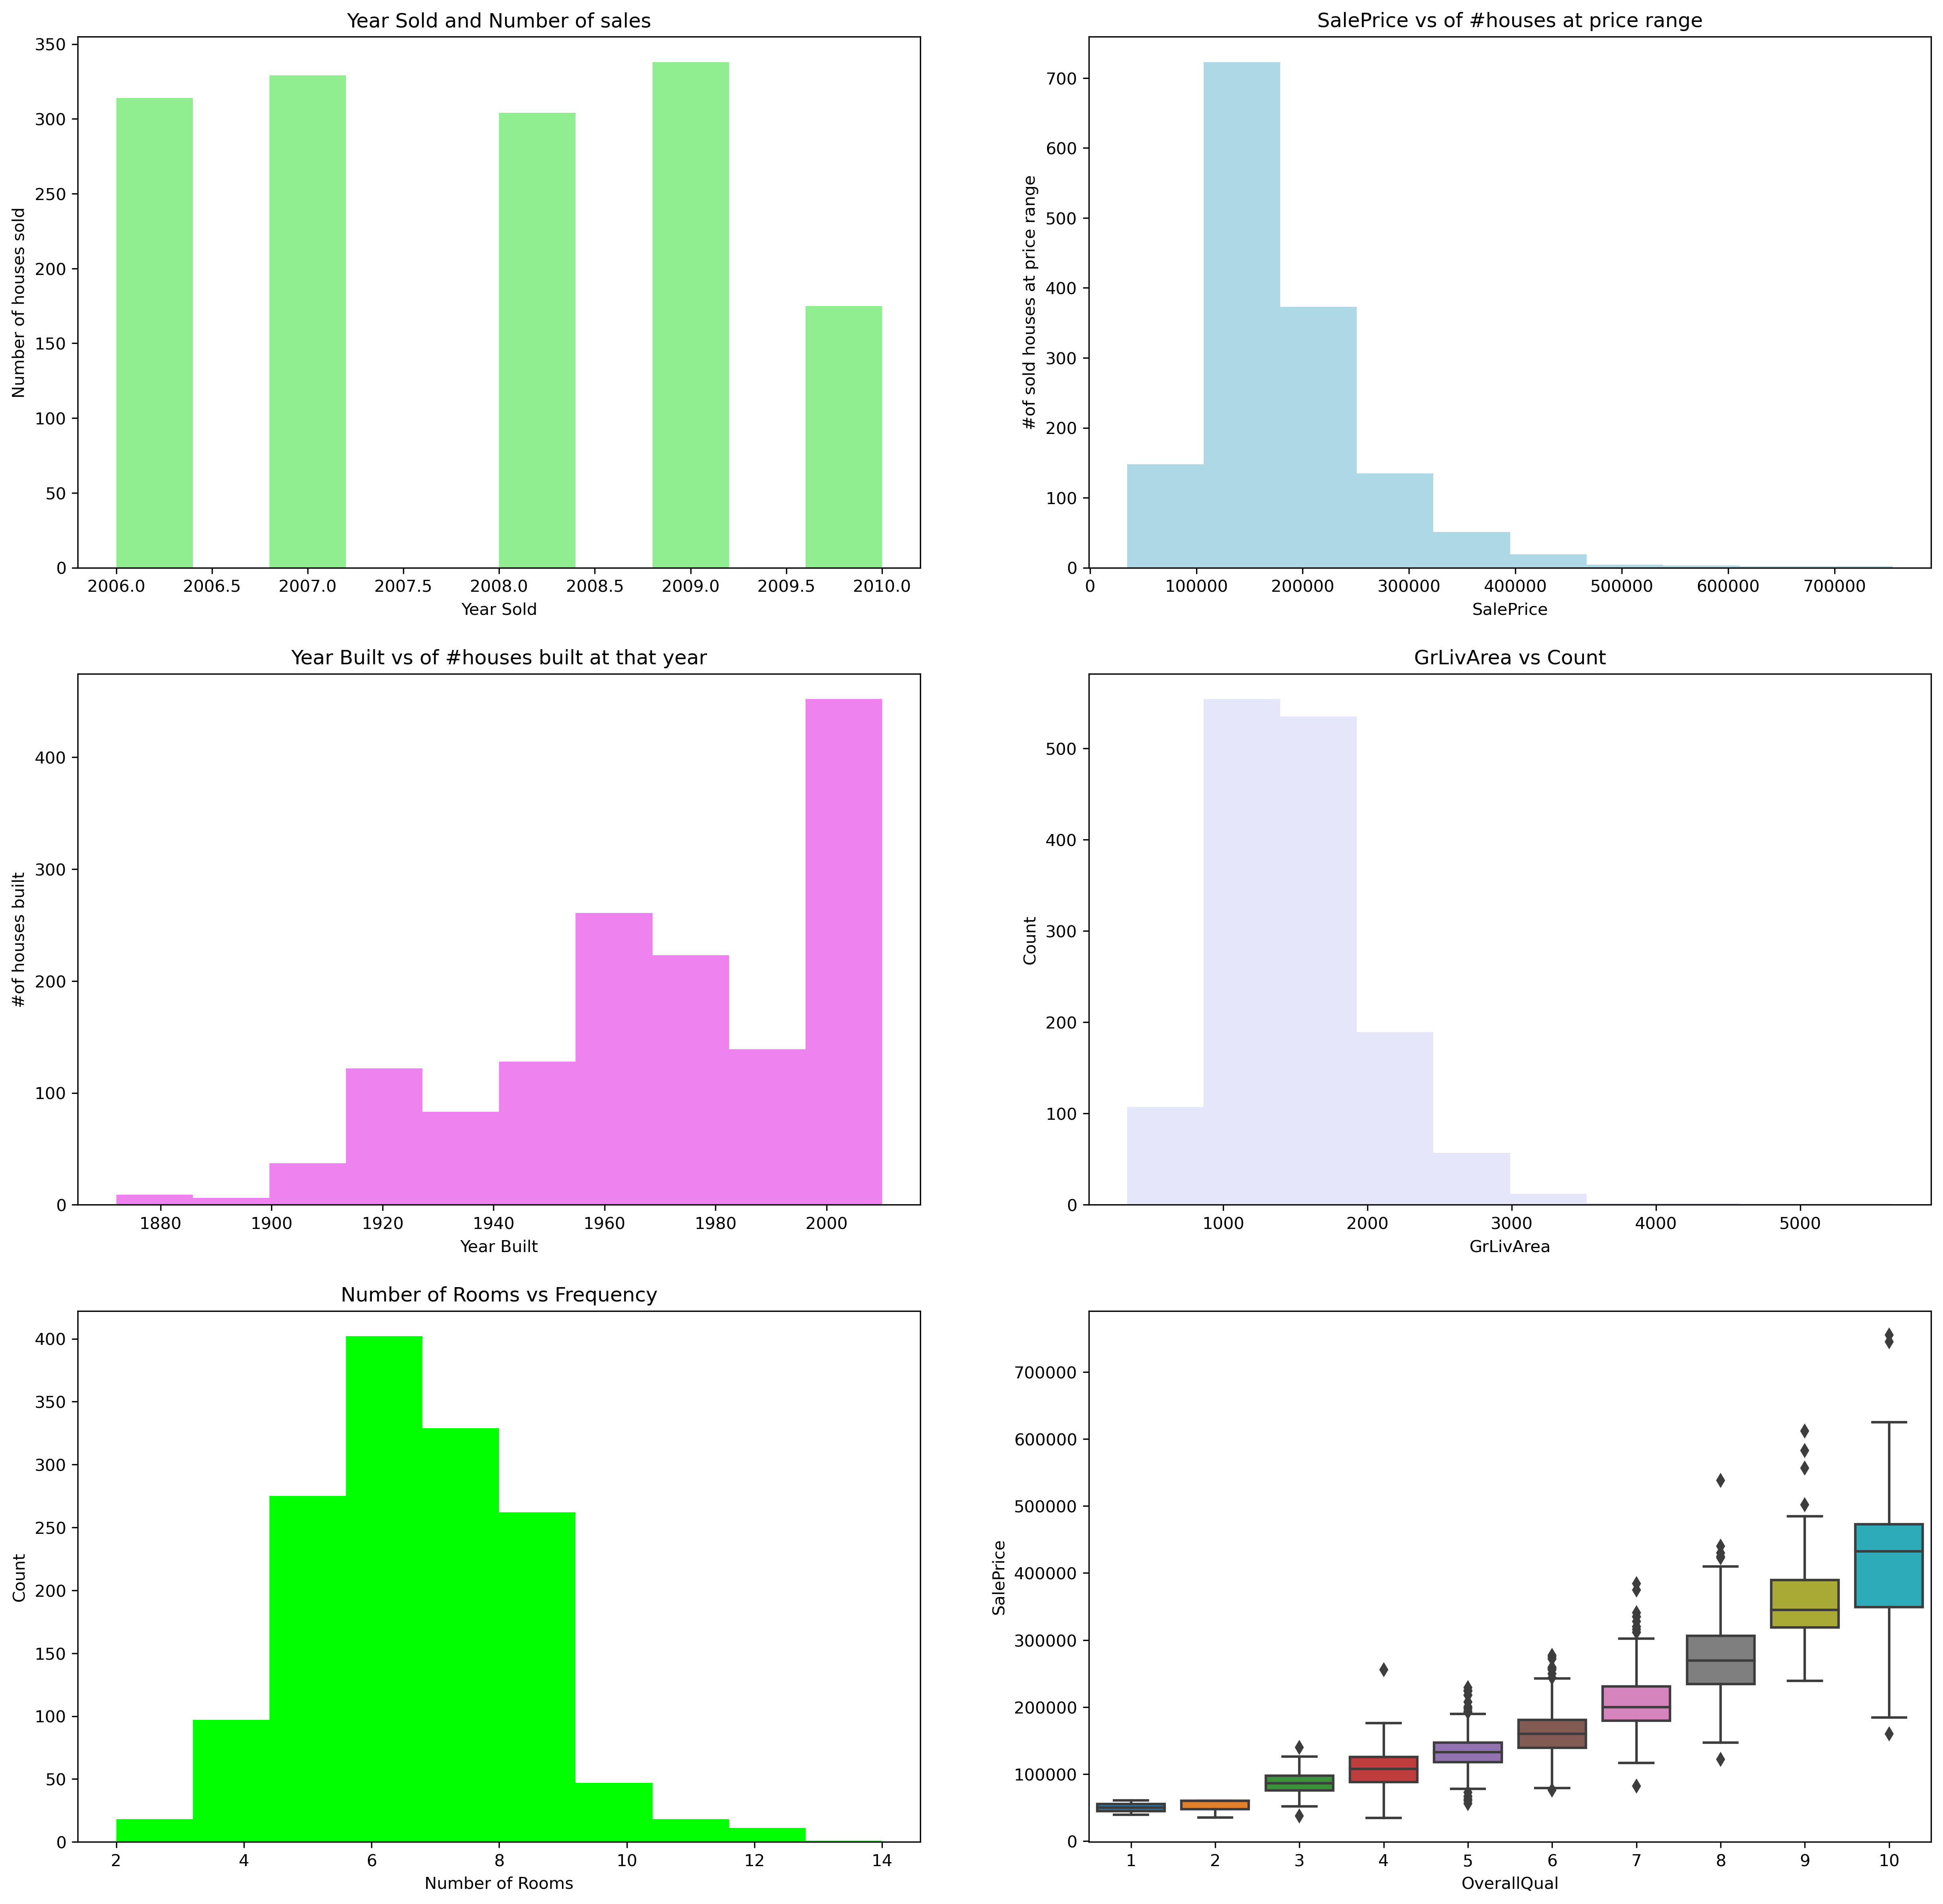

In [20]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax8 = plt.subplot(3, 2, 1)
ames.YrSold.hist(color='lightgreen',grid=False)
plt.xlabel('Year Sold');
plt.ylabel('Number of houses sold');
plt.title('Year Sold and Number of sales')
ax9 = plt.subplot(3, 2, 2)

ames.SalePrice.hist(color='lightblue',grid=False)
plt.xlabel('SalePrice');
plt.ylabel('#of sold houses at price range');
plt.title('SalePrice vs of #houses at price range')    
ax10 = plt.subplot(3, 2, 3)

ames.YearBuilt.hist(color='violet',grid=False)

plt.xlabel('Year Built');
plt.ylabel('#of houses built');
plt.title('Year Built vs of #houses built at that year') 
ax11 = plt.subplot(3, 2, 4)

ames.GrLivArea.hist(color='lavender',grid=False)

plt.xlabel('GrLivArea');
plt.ylabel('Count');
plt.title('GrLivArea vs Count')

ax12 = plt.subplot(3, 2, 5)

ames.TotRmsAbvGrd.hist(color='lime',grid=False)

plt.xlabel('Number of Rooms');
plt.ylabel('Count');
plt.title('Number of Rooms vs Frequency');

#Below box plot adopted from class material
ax17 = plt.subplot(3, 2, 6)
sns.boxplot(data=ames, x='OverallQual', y='SalePrice');

plt.savefig('plots');

* #### The histograms above give us a sense of the distributions of some fetures, however,
* #### We are interested in the distrubtuion of our target varibale 'SalePrice'

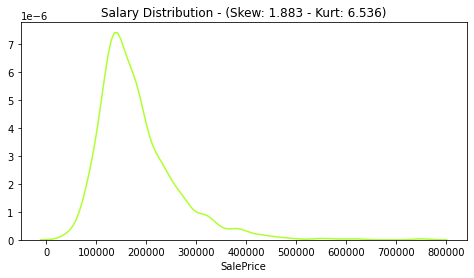

In [21]:
fig = plt.figure(figsize=(8,4))
plt.title('Salary Distribution - (Skew: {:.3f} - Kurt: {:.3f})'.format(ames.SalePrice.skew(),ames.SalePrice.kurt()))
plt.xlabel('Salary')
sns.distplot(ames.SalePrice,hist=False,color='greenyellow');

* #### 'SalePrice' follows a normal distribution with a positive skew to the right and high kurtosis

#### Box Plot of SalePrice to furthur investigate the target

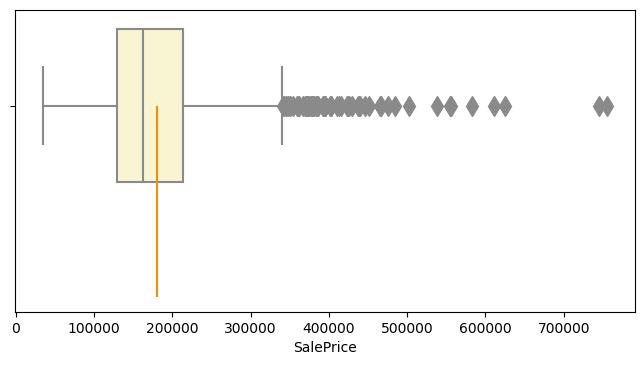

In [22]:
#Code was mainly adopted from class material
fig = plt.figure(figsize=(8,4),dpi = 100)
sns.boxplot(ames.SalePrice,color='lemonchiffon',fliersize =10);

plt.vlines(x=ames.SalePrice.mean(), ymin=0, ymax=1, colors='darkorange');
#sns.boxplot?
 

* ### Observations:
* ##### The IQR falls between ~130k to ~250k while the mean sits at around 180k
* ##### There is a huge presence of outliers, which probably forced the distrbution to have a positive skew
* ##### Let's look at the SalePrice.describe again

In [23]:
ames.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
col_object_list = list(ames.select_dtypes(include=['object']).columns)
ames.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### For the purpose of modeling, we will engineer ordinal and categorical features In a such a way that would fit our model
* ##### Categorical varibiles --> pd.get_dummies
* ##### Ordinal --> Map to int
* ##### If a feature has a certain category or 'order' that is very frquent, we will drop it

In [25]:
#Print values counts of each 'object' type columns
for col in col_object_list:
    print(ames[col].value_counts(dropna=False))
    print('\n******************\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

******************

Pave    1454
Grvl       6
Name: Street, dtype: int64

******************

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

******************

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

******************

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

******************

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

******************

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

******************

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

******************

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber

* Street,Alley,Utilities,Condition2,RoofMatl,Heating,CentralAir,FireplaceQu,PavedDrive,GarageCond,GarageQual,PoolQC
* MiscFeature,SaleType
* The above features will be dropped from our model due to having a high number of missing values or a certain attribute of a feature is occuring freqently 

## Data Cleaning and Dealing with missing values

* From earlier:

In [26]:
missing_data.head(20)

Total Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageCond               81    5.547945
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
MasVnrType                8    0.547945
Electrical                1    0.068493
Utilities                 0    0.000000

In [27]:
col_to_drop_withHigh_NaN_Per = missing_data[missing_data['Percentage'] > 15].index

ames.drop(col_to_drop_withHigh_NaN_Per, axis=1, inplace=True)
#The code above dropped columns where NaNs accumlate >=15% of values

In [28]:
#Dropped columns where NaNs accumlate >=15% of values are:
col_to_drop_withHigh_NaN_Per

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [29]:
#code to view the rest of missing values
missing_valus_less15_Per = ames.isnull().sum().sort_values(ascending=False)
less15_Per_missing = ((ames.isnull().sum()) / (ames.isnull().count())).sort_values(ascending=False).mul(100)

less15_Per_data = pd.concat([missing_valus_less15_Per, less15_Per_missing], axis=1,keys=['Total Missing', 'Percentage'])
less15_Per_data.head(15)


Total Missing  Percentage
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageCond               81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrType                8    0.547945
MasVnrArea                8    0.547945
Electrical                1    0.068493
RoofMatl                  0    0.000000
RoofStyle                 0    0.000000

In [30]:
ames.shape

(1460, 75)

* Street,Utilities,Condition2,RoofMatl,Heating,CentralAir,PavedDrive,GarageCond,GarageQual,SaleType
* The above features will be dropped from our model due to having a high number of missing values or
* a certain attribute of a feature is occuring freqently

In [31]:
cols_to_drop = ['Street','Utilities','Condition2','RoofMatl','Heating',\
'CentralAir','PavedDrive','GarageCond','GarageQual','SaleType']
ames.drop(ames[cols_to_drop], axis=1, inplace=True)

In [32]:
ames.shape

(1460, 65)

In [33]:
missing_gra_val = ames[['GarageType','GarageYrBlt','GarageFinish']].isnull()
missing_gra_val[missing_gra_val['GarageType'] == True].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [34]:
missing_gra_val[missing_gra_val['GarageYrBlt'] == True].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [35]:
missing_gra_val[missing_gra_val['GarageFinish'] == True].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [36]:
index_list = list(missing_gra_val[missing_gra_val['GarageFinish'] == True].index)

* Indicies of the missing values of GarageType, GarageYrBlt, GarageFinish are matching. we will drop the attributes

In [37]:
ames.drop(index=index_list,inplace = True)

In [38]:
ames.shape

(1379, 65)

* 'Electrical' has only one missing values, but 'skbrkr' occures more 1300 times. we will drop the feature

In [39]:
ames[ames.Electrical.isnull()]['Electrical']

1379    NaN
Name: Electrical, dtype: object

In [40]:
ames.drop(ames[['Electrical']], axis=1, inplace=True)

In [41]:
missing_valus1 = ames.isnull().sum().sort_values(ascending=False)
missing_valus1_per = ((ames.isnull().sum()) / (ames.isnull().count())).sort_values(ascending=False).mul(100)

Per_data = pd.concat([missing_valus1,missing_valus1_per], axis=1,keys=['Total Missing', 'Percentage'])
Per_data.head(9)

Total Missing  Percentage
BsmtFinType2              31    2.248006
BsmtExposure              31    2.248006
BsmtFinType1              30    2.175489
BsmtCond                  30    2.175489
BsmtQual                  30    2.175489
MasVnrArea                 8    0.580131
MasVnrType                 8    0.580131
SalePrice                  0    0.000000
SaleCondition              0    0.000000

In [42]:
missing_values_col = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea']

In [43]:
for col in missing_values_col:
    print(ames[col].value_counts(dropna=False))
    print('\n******************\n')

Unf    1186
Rec      53
LwQ      46
BLQ      32
NaN      31
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

******************

No     896
Av     213
Gd     128
Mn     111
NaN     31
Name: BsmtExposure, dtype: int64

******************

GLQ    408
Unf    396
ALQ    209
BLQ    141
Rec    126
LwQ     69
NaN     30
Name: BsmtFinType1, dtype: int64

******************

TA     1247
Gd       63
Fa       38
NaN      30
Po        1
Name: BsmtCond, dtype: int64

******************

Gd     601
TA     595
Ex     121
Fa      32
NaN     30
Name: BsmtQual, dtype: int64

******************

0.0      786
72.0       8
108.0      8
NaN        8
180.0      8
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
621.0      1
Name: MasVnrArea, Length: 328, dtype: int64

******************



* The features below will be dropped due to the frequency of a certain attribute

In [44]:
missing_values_col[:-1]

['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

In [45]:
ames.drop(ames[missing_values_col[:-1]], axis=1, inplace=True)

In [46]:
ames.shape

(1379, 59)

In [47]:
ames.MasVnrArea.describe()

count    1371.000000
mean      108.997082
std       184.545459
min         0.000000
25%         0.000000
50%         0.000000
75%       171.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [48]:
print('Mode: {}'.format(ames.MasVnrArea.mode()))
print('\n')
print('Mean: {}'.format(ames.MasVnrArea.mean()))
print('\n')
print('Median: {}'.format(ames.MasVnrArea.median()))

Mode: 0    0.0
dtype: float64


Mean: 108.99708242159008


Median: 0.0


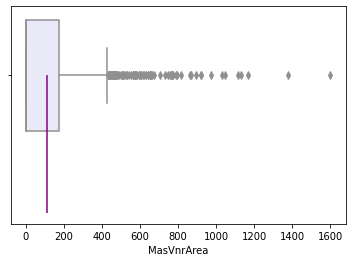

In [49]:
sns.boxplot(ames.MasVnrArea,color='lavender',fliersize =5);
plt.vlines(x=ames.MasVnrArea.mean(), ymin=0, ymax=1, colors='purple');

* Missing values of 'MasVnrArea' will be imputed by the mean

In [50]:
ames['MasVnrArea'] = ames['MasVnrArea'].fillna(ames.MasVnrArea.mean())

In [51]:
ames.MasVnrArea.isnull().sum()

0

In [52]:
ames.MasVnrType.value_counts()

None       789
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [53]:
ames.MasVnrType.isnull().sum()

8

* Since None is most frequent, we will use it to fill the missing values (Non scientific assumption :) )

In [54]:
ames['MasVnrType'] = ames['MasVnrType'].fillna('None')

In [55]:
ames.MasVnrType.value_counts()

None       797
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [56]:
ames.shape

(1379, 59)

In [57]:
ames.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [58]:
ames.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [59]:
ames.select_dtypes(include=['float64']).columns

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

### Correlation Matrix

##### Cosmatics of the correlation matrix were mainly adopted from classs material.

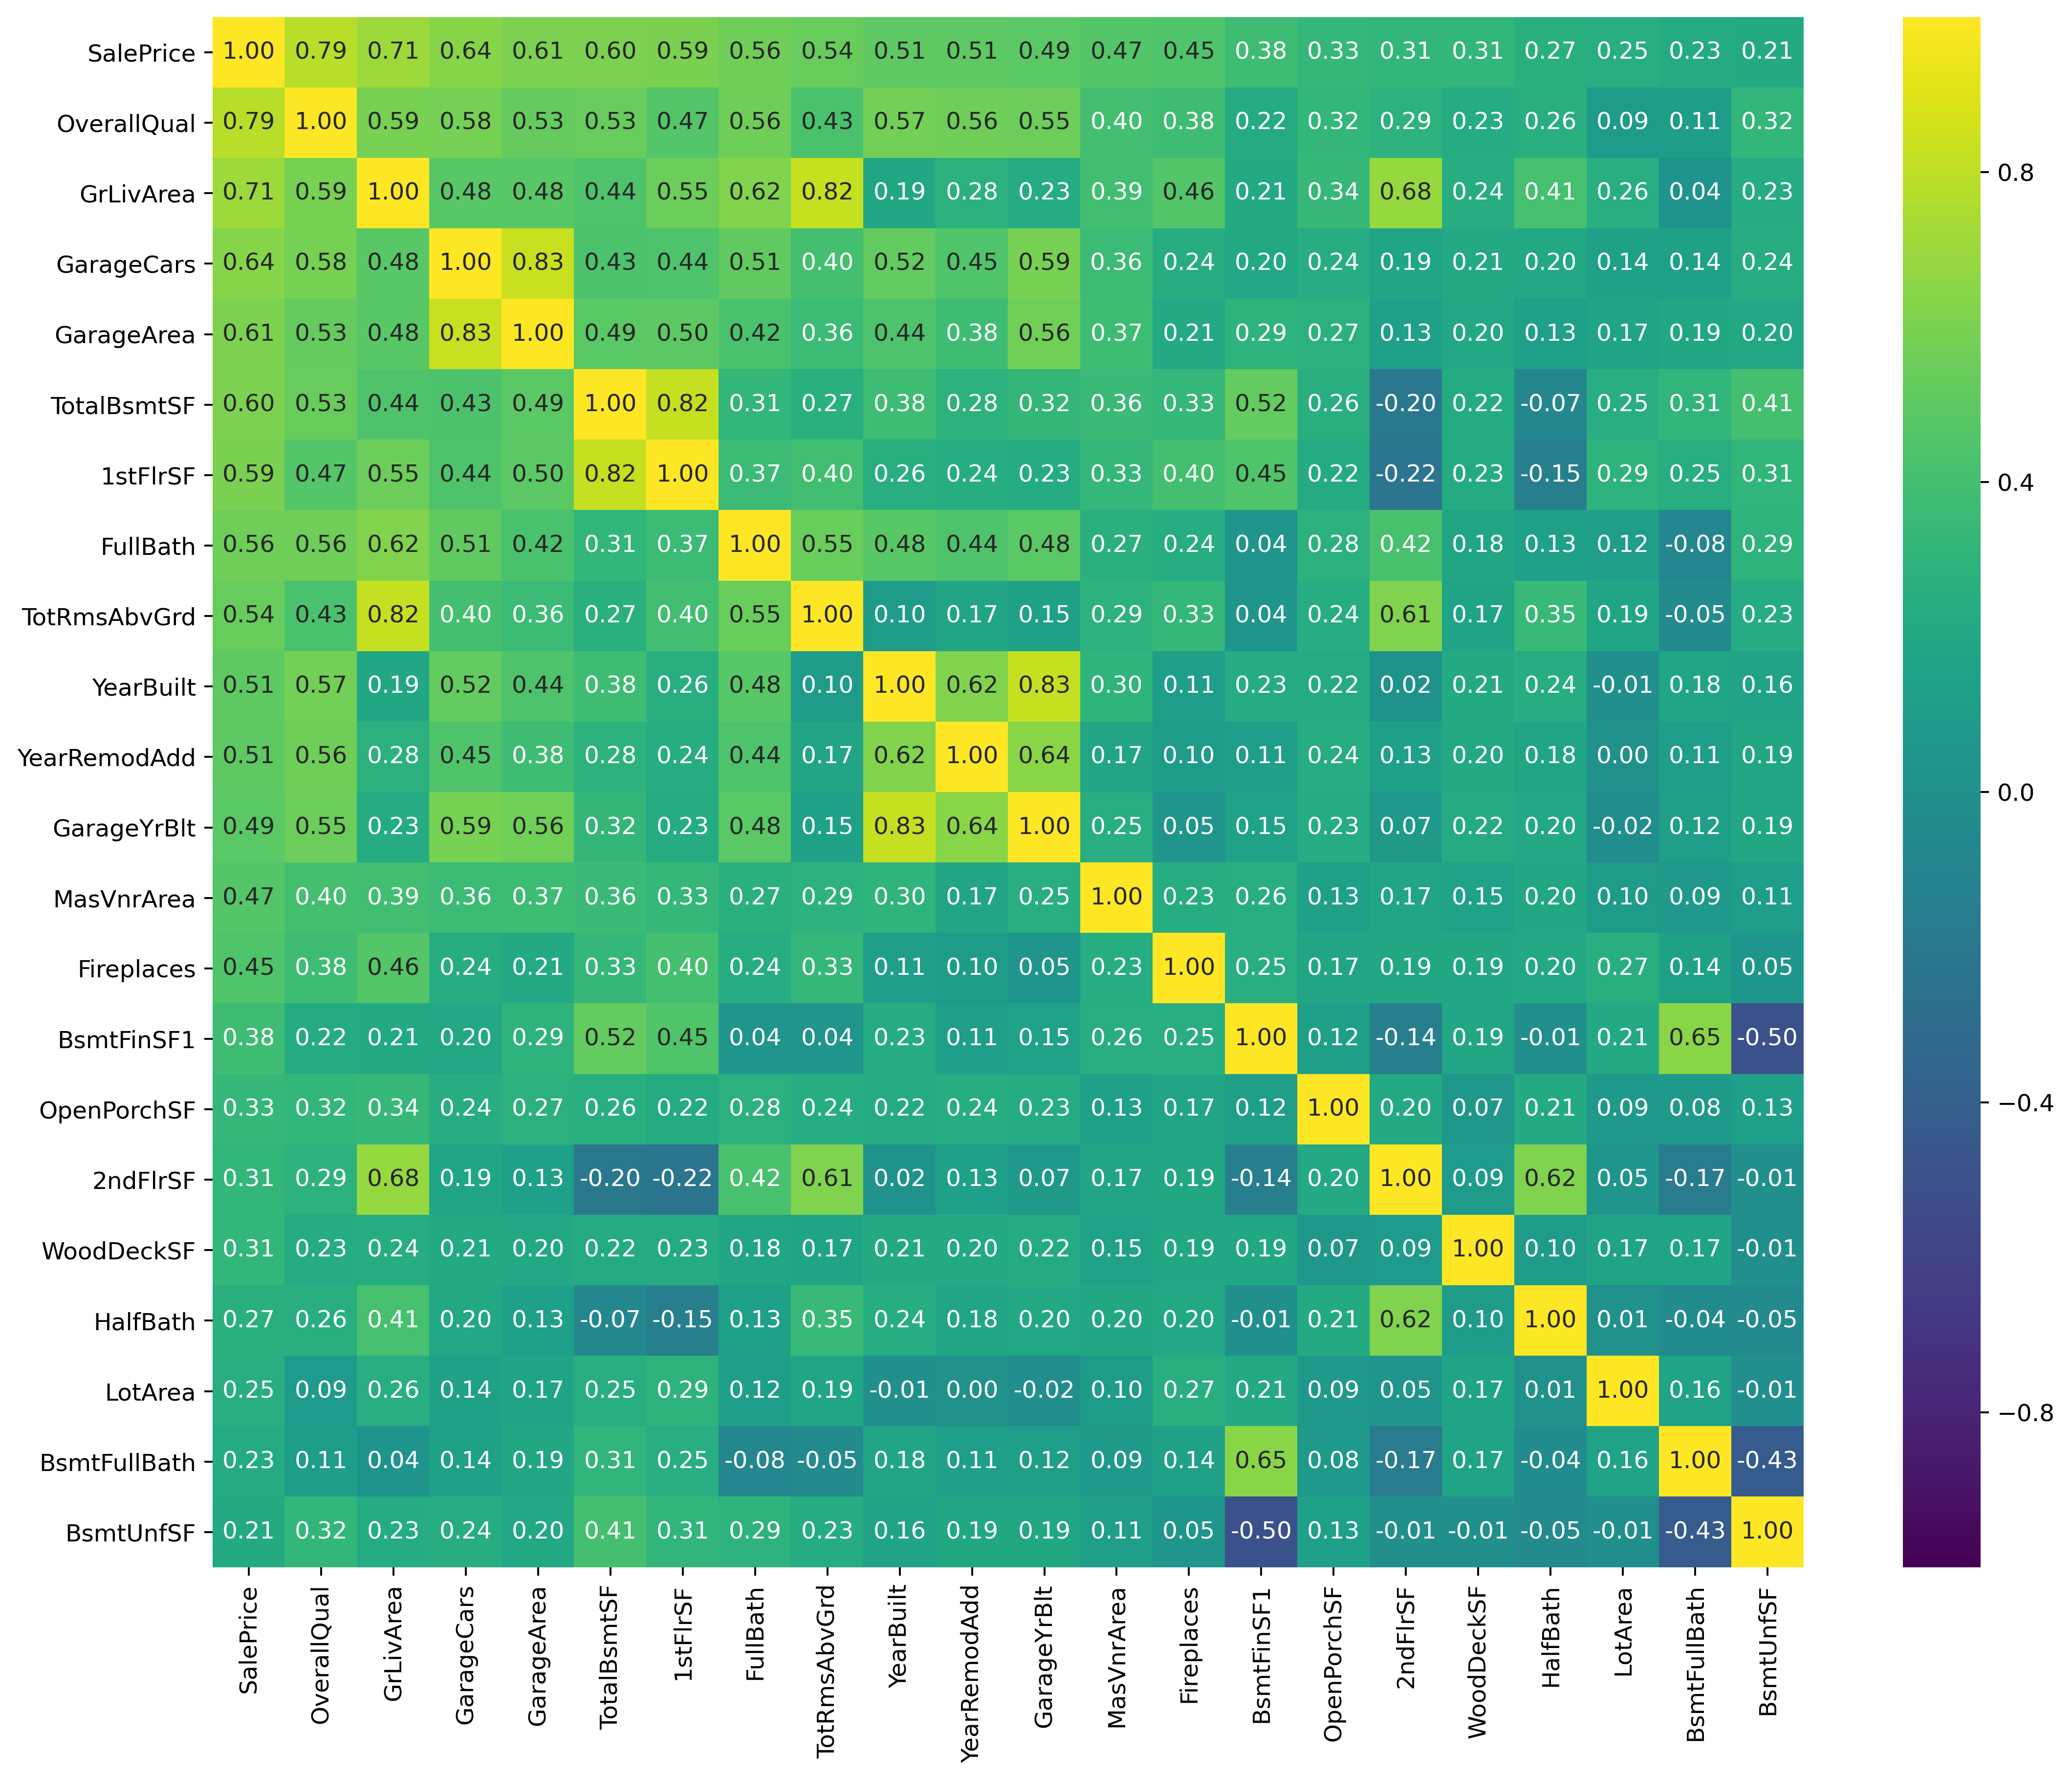

In [60]:
fig = plt.figure(figsize=(15,12), dpi=350)
columns = ames.corr().nlargest(22, 'SalePrice')['SalePrice'].index
corr_mat = np.corrcoef(ames[columns].values.T)

sns.heatmap(corr_mat,cmap='viridis', vmin=-1, vmax=+1, annot=True, fmt='.2f',\
xticklabels=columns.values, yticklabels=columns.values);

# Modeling

### From the Correlation Matrix above, we will consider features that have corr of 0.5 and above.
* We will use this approach first, then we will consider other approaches as needed.
* Those features are with high correlation are numric and none are categorical.
* On the first attempt, we will only consider these and adjust accordingly

In [61]:
initial_model_features =['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',\
'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','SalePrice','YrSold']
ames[initial_model_features].head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  MasVnrArea  \
0         2             8       2003          2003       2003.0       196.0   
1         2             6       1976          1976       1976.0         0.0   
2         2             6       2001          2002       2001.0       162.0   
3         1             7       1915          1970       1998.0         0.0   
4         2             9       2000          2000       2000.0       350.0   

   SalePrice  YrSold  
0     208500    2008  
1     181500    2007  
2     223500    2008  
3     140000    2006  
4     250000    2008

### Modeling using different regression models 

* We will start with sklearn Linear regression, Theil-Sen, RANSAC and Huber models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TheilSenRegressor,\
RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score

In [63]:
data_to_model = ames[initial_model_features]

In [64]:
X = data_to_model.drop('SalePrice', axis=1)

In [65]:
Y = data_to_model['SalePrice']

#### Model Instantiation and fitting

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
lr = LinearRegression()
TSR = TheilSenRegressor()
RANSAC = RANSACRegressor()
Huber = HuberRegressor()

lr.fit(X_train,Y_train)
TSR.fit(X_train,Y_train)
RANSAC.fit(X_train,Y_train)
Huber.fit(X_train,Y_train);


#### Prediction results and metrics output for each model

In [67]:
Y_preds_lr = lr.predict(X_test)
Y_preds_TSR = TSR.predict(X_test)
Y_preds_RANSAC = RANSAC.predict(X_test)
Y_preds_Huber = Huber.predict(X_test)

In [68]:
print('Linear Regression Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_lr)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_lr)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_lr))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_lr)))
print("R2: {:.2f}".format(r2_score(Y_test, Y_preds_lr)))
print('\n')
print('TheilSen Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_TSR)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_TSR)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_TSR))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_TSR)))
print("R2_score: {:.2f}".format(r2_score(Y_test, Y_preds_TSR)))
print('\n')
print('RANSAC Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_RANSAC)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_RANSAC)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_RANSAC))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_RANSAC)))
print("R2_score: {:.2f}".format(r2_score(Y_test, Y_preds_RANSAC)))
print('\n')
print('Huber Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_Huber)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_Huber)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_Huber))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_Huber)))
print("R2: {:.2f}".format(r2_score(Y_test, Y_preds_Huber)))
print('\n')

Linear Regression Metrics
MAE: 25344.42
MSE: 1482932034.50
RMSE: 38508.86
MedianAE: 19812.97
R2: 0.75


TheilSen Metrics
MAE: 26858.09
MSE: 1691173239.39
RMSE: 41123.88
MedianAE: 18216.73
R2_score: 0.72


RANSAC Metrics
MAE: 27400.27
MSE: 1807719362.92
RMSE: 42517.28
MedianAE: 18438.69
R2_score: 0.70


Huber Metrics
MAE: 26571.35
MSE: 1765317532.02
RMSE: 42015.68
MedianAE: 16603.27
R2: 0.71




#### Sample Dataframes of each model prediction and corresponding Y test

In [69]:
test_preds_lr = {'Y_test': Y_test,'Y_preds': Y_preds_lr}
df_lr = pd.DataFrame(data = test_preds_lr)
df_lr['Diff'] = df_lr['Y_preds'] - df_lr['Y_test']
df_lr['pct'] = ((df_lr['Y_preds'] - df_lr['Y_test'])/(df_lr['Y_test'])) * 100

test_preds_TSR = {'Y_test': Y_test,'Y_preds': Y_preds_TSR}
df_TSR = pd.DataFrame(data = test_preds_TSR)
df_TSR['Diff'] = df_TSR['Y_preds'] - df_TSR['Y_test']
df_TSR['pct'] = ((df_TSR['Y_preds'] - df_TSR['Y_test'])/(df_TSR['Y_test'])) * 100

test_preds_RANSAC = {'Y_test': Y_test,'Y_preds': Y_preds_RANSAC}
df_RANSAC = pd.DataFrame(data = test_preds_RANSAC)
df_RANSAC['Diff'] = df_RANSAC['Y_preds'] - df_RANSAC['Y_test']
df_RANSAC['pct'] = ((df_RANSAC['Y_preds'] - df_RANSAC['Y_test'])/(df_RANSAC['Y_test'])) * 100

test_preds_Huber = {'Y_test': Y_test,'Y_preds': Y_preds_Huber}
df_Huber = pd.DataFrame(data = test_preds_Huber)
df_Huber['Diff'] = df_Huber['Y_preds'] - df_Huber['Y_test']
df_Huber['pct'] = ((df_Huber['Y_preds'] - df_Huber['Y_test'])/(df_Huber['Y_test'])) * 100


In [70]:
df_lr.head()

Y_test        Y_preds          Diff        pct
640  274000  262838.120064 -11161.879936  -4.073679
931  117500  100811.160932 -16688.839068 -14.203267
676   87000  146958.306428  59958.306428  68.917594
452  204000  190498.311301 -13501.688699  -6.618475
958  185000  206896.038962  21896.038962  11.835697

In [71]:
df_TSR.head()

Y_test        Y_preds          Diff        pct
640  274000  250832.482689 -23167.517311  -8.455298
931  117500  113683.450288  -3816.549712  -3.248127
676   87000  173387.548919  86387.548919  99.296033
452  204000  187322.119203 -16677.880797  -8.175432
958  185000  201488.219245  16488.219245   8.912551

In [72]:
df_RANSAC.head()

Y_test        Y_preds          Diff        pct
640  274000  229234.633427 -44765.366573 -16.337725
931  117500  120763.266704   3263.266704   2.777248
676   87000  121070.790561  34070.790561  39.161828
452  204000  190976.176952 -13023.823048  -6.384227
958  185000  196914.722907  11914.722907   6.440391

In [73]:
df_Huber.head()

Y_test        Y_preds          Diff         pct
640  274000  229870.703686 -44129.296314  -16.105583
931  117500  116109.809555  -1390.190445   -1.183141
676   87000  177405.560017  90405.560017  103.914437
452  204000  195975.575869  -8024.424131   -3.933541
958  185000  196775.196555  11775.196555    6.364971

In [74]:
#Percentage of difference

In [75]:
#pct_change = ((df['Y_preds'].sum() - df['Y_test'].sum())/(df['Y_preds'].sum())) * 100

In [76]:
#pct_change

#### Plots of the predicted price and actual price for each model

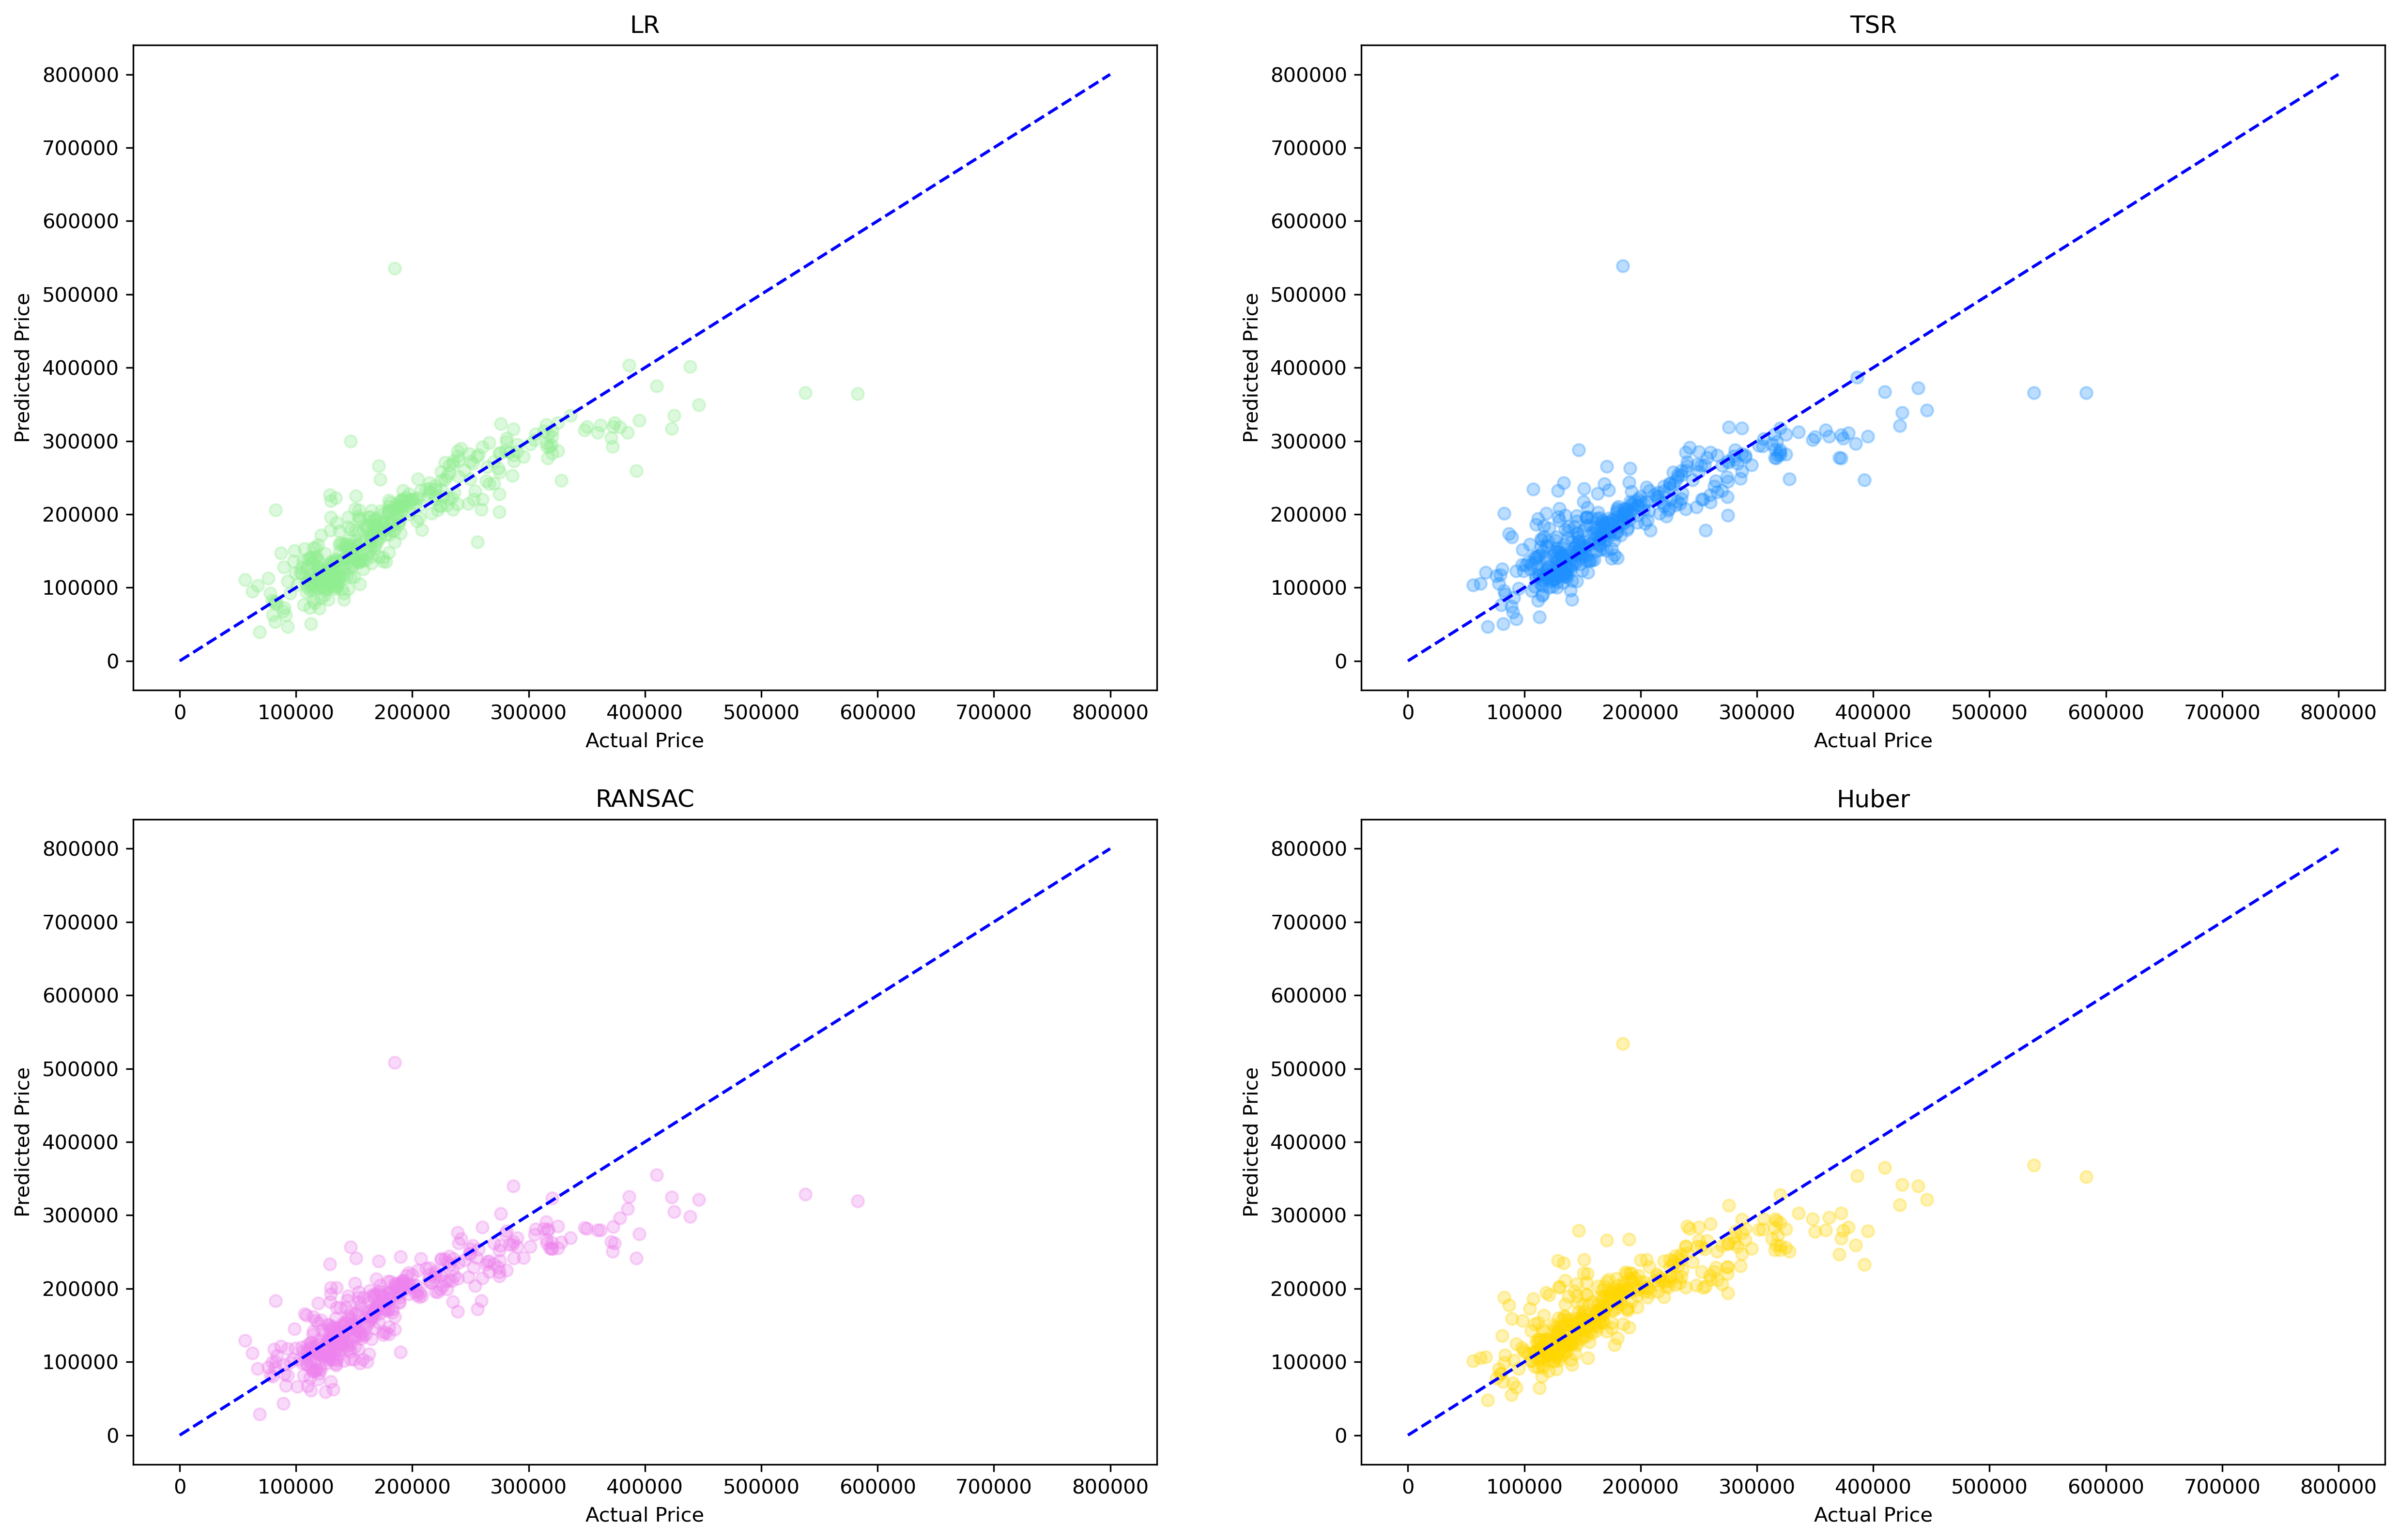

In [77]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax20 = plt.subplot(3, 2, 1)
plt.scatter('Y_test', 'Y_preds',data=df_lr, c='lightgreen', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LR')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--');

ax21 = plt.subplot(3, 2, 2)
plt.scatter('Y_test', 'Y_preds',data=df_TSR, c='dodgerblue', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('TSR')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 

ax10 = plt.subplot(3, 2, 3)
plt.scatter('Y_test', 'Y_preds',data=df_RANSAC, c='violet', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RANSAC')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 

ax11 = plt.subplot(3, 2, 4)
plt.scatter('Y_test', 'Y_preds',data=df_Huber, c='gold', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Huber')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 
plt.savefig('Plots_model1')

In [78]:
col_object_list = list(ames.select_dtypes(include=['object']).columns)
ames.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')

In [79]:
for col in col_object_list:
    print(ames[col].value_counts(dropna=False))
    print('\n******************\n')

RL         1101
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64

******************

Reg    861
IR1    467
IR2     41
IR3     10
Name: LotShape, dtype: int64

******************

Lvl    1244
Bnk      54
HLS      48
Low      33
Name: LandContour, dtype: int64

******************

Inside     988
Corner     250
CulDSac     93
FR2         44
FR3          4
Name: LotConfig, dtype: int64

******************

Gtl    1306
Mod      61
Sev      12
Name: LandSlope, dtype: int64

******************

NAmes      219
CollgCr    148
OldTown    101
Somerst     86
Gilbert     79
Edwards     78
NridgHt     77
NWAmes      73
Sawyer      71
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

******************

Norm      1195
Feedr       69
Art

### Modeling while including Categorical variables

* Features to Drop

In [80]:
data_new = ames
list_to_drop = ['LotConfig','LotShape','Condition1','Exterior1st','Exterior2nd','HeatingQC',\
'KitchenQual','Functional']
data_new = data_new.drop(data_new[list_to_drop], axis=1)

* Features to include:

In [81]:
cat_features_to_model = ['SaleCondition','GarageFinish','GarageType','Foundation','MasVnrType','RoofStyle'\
,'BldgType','LandSlope','LandContour','MSZoning','HouseStyle','ExterQual','ExterCond','Neighborhood']
initial_model_features =['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',\
'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','SalePrice','YrSold']

In [82]:
data_new.shape

(1379, 51)

In [83]:
for col in data_new.columns:
    if (col not in cat_features_to_model) & (col not in initial_model_features):
        data_new.drop(columns = col,axis=1,inplace = True)

In [84]:
data_new.shape

(1379, 28)

In [85]:
data_new.columns

Index(['MSZoning', 'LandContour', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

* Converting Categorical variables to dummies

In [86]:
data_new = pd.get_dummies(data_new, drop_first=True,columns = cat_features_to_model)

In [87]:
data_new.head()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0            7       2003          2003       196.0          856       856   
1            6       1976          1976         0.0         1262      1262   
2            7       2001          2002       162.0          920       920   
3            7       1915          1970         0.0          756       961   
4            8       2000          2000       350.0         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  GarageYrBlt  ...  Neighborhood_NoRidge  \
0       1710         2             8       2003.0  ...                     0   
1       1262         2             6       1976.0  ...                     0   
2       1786         2             6       2001.0  ...                     0   
3       1717         1             7       1998.0  ...                     0   
4       2198         2             9       2000.0  ...                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  
0                     0                    0                     0  
1                     0                    0                     1  
2                     0                    0                     0  
3                     0                    0                     0  
4                     0                    0                     0  

[5 rows x 89 columns]

In [88]:
data_new.shape

(1379, 89)

### Modeling

In [89]:
X = data_new.drop('SalePrice', axis=1)
Y = data_new['SalePrice']

#### Model Instantiation and fitting

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
lr = LinearRegression()
TSR = TheilSenRegressor()
RANSAC = RANSACRegressor()
Huber = HuberRegressor()

lr.fit(X_train,Y_train)
TSR.fit(X_train,Y_train)
RANSAC.fit(X_train,Y_train)
Huber.fit(X_train,Y_train);

#### Prediction results and metrics output for each model

In [91]:
Y_preds_lr = lr.predict(X_test)
Y_preds_TSR = TSR.predict(X_test)
Y_preds_RANSAC = RANSAC.predict(X_test)
Y_preds_Huber = Huber.predict(X_test)

In [92]:
print('Linear Regression Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_lr)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_lr)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_lr))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_lr)))
print("R2: {:.2f}".format(r2_score(Y_test, Y_preds_lr)))
print('\n')
print('TheilSen Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_TSR)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_TSR)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_TSR))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_TSR)))
print("R2_score: {:.2f}".format(r2_score(Y_test, Y_preds_TSR)))
print('\n')
print('RANSAC Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_RANSAC)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_RANSAC)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_RANSAC))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_RANSAC)))
print("R2_score: {:.2f}".format(r2_score(Y_test, Y_preds_RANSAC)))
print('\n')
print('Huber Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_Huber)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_Huber)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_Huber))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_Huber)))
print("R2: {:.2f}".format(r2_score(Y_test, Y_preds_Huber)))
print('\n')

Linear Regression Metrics
MAE: 22996.04
MSE: 1210757381.26
RMSE: 34795.94
MedianAE: 16342.31
R2: 0.80


TheilSen Metrics
MAE: 21432.37
MSE: 1215354792.95
RMSE: 34861.94
MedianAE: 14092.23
R2_score: 0.80


RANSAC Metrics
MAE: 23471.34
MSE: 1388390841.19
RMSE: 37261.12
MedianAE: 15367.56
R2_score: 0.77


Huber Metrics
MAE: 26553.21
MSE: 1762758599.49
RMSE: 41985.22
MedianAE: 16455.80
R2: 0.71




In [93]:
test_preds_lr = {'Y_test': Y_test,'Y_preds': Y_preds_lr}
df_lr = pd.DataFrame(data = test_preds_lr)
df_lr['Diff'] = df_lr['Y_preds'] - df_lr['Y_test']
df_lr['pct'] = ((df_lr['Y_preds'] - df_lr['Y_test'])/(df_lr['Y_test'])) * 100

test_preds_TSR = {'Y_test': Y_test,'Y_preds': Y_preds_TSR}
df_TSR = pd.DataFrame(data = test_preds_TSR)
df_TSR['Diff'] = df_TSR['Y_preds'] - df_TSR['Y_test']
df_TSR['pct'] = ((df_TSR['Y_preds'] - df_TSR['Y_test'])/(df_TSR['Y_test'])) * 100

test_preds_RANSAC = {'Y_test': Y_test,'Y_preds': Y_preds_RANSAC}
df_RANSAC = pd.DataFrame(data = test_preds_RANSAC)
df_RANSAC['Diff'] = df_RANSAC['Y_preds'] - df_RANSAC['Y_test']
df_RANSAC['pct'] = ((df_RANSAC['Y_preds'] - df_RANSAC['Y_test'])/(df_RANSAC['Y_test'])) * 100

test_preds_Huber = {'Y_test': Y_test,'Y_preds': Y_preds_Huber}
df_Huber = pd.DataFrame(data = test_preds_Huber)
df_Huber['Diff'] = df_Huber['Y_preds'] - df_Huber['Y_test']
df_Huber['pct'] = ((df_Huber['Y_preds'] - df_Huber['Y_test'])/(df_Huber['Y_test'])) * 100


In [94]:
df_lr.head()

Y_test        Y_preds          Diff        pct
640  274000  279479.786538   5479.786538   1.999922
931  117500  107863.617387  -9636.382613  -8.201177
676   87000  124107.188448  37107.188448  42.651941
452  204000  208439.102747   4439.102747   2.176031
958  185000  202251.175153  17251.175153   9.324960

In [95]:
df_TSR.head()

Y_test        Y_preds          Diff        pct
640  274000  285537.267682  11537.267682   4.210682
931  117500  115694.216444  -1805.783556  -1.536837
676   87000   97457.016767  10457.016767  12.019560
452  204000  203913.121890    -86.878110  -0.042587
958  185000  197390.088211  12390.088211   6.697345

In [96]:
df_RANSAC.head()

Y_test        Y_preds          Diff         pct
640  274000  290156.216045  16156.216045    5.896429
931  117500  117060.891880   -439.108120   -0.373709
676   87000  179335.755153  92335.755153  106.133052
452  204000  192897.485027 -11102.514973   -5.442409
958  185000  195698.719003  10698.719003    5.783091

In [97]:
df_Huber.head()

Y_test        Y_preds          Diff         pct
640  274000  230084.506890 -43915.493110  -16.027552
931  117500  115971.720800  -1528.279200   -1.300663
676   87000  177579.943420  90579.943420  104.114877
452  204000  196180.646542  -7819.353458   -3.833016
958  185000  196621.739207  11621.739207    6.282021

#### Plots of the predicted price and actual price for each model

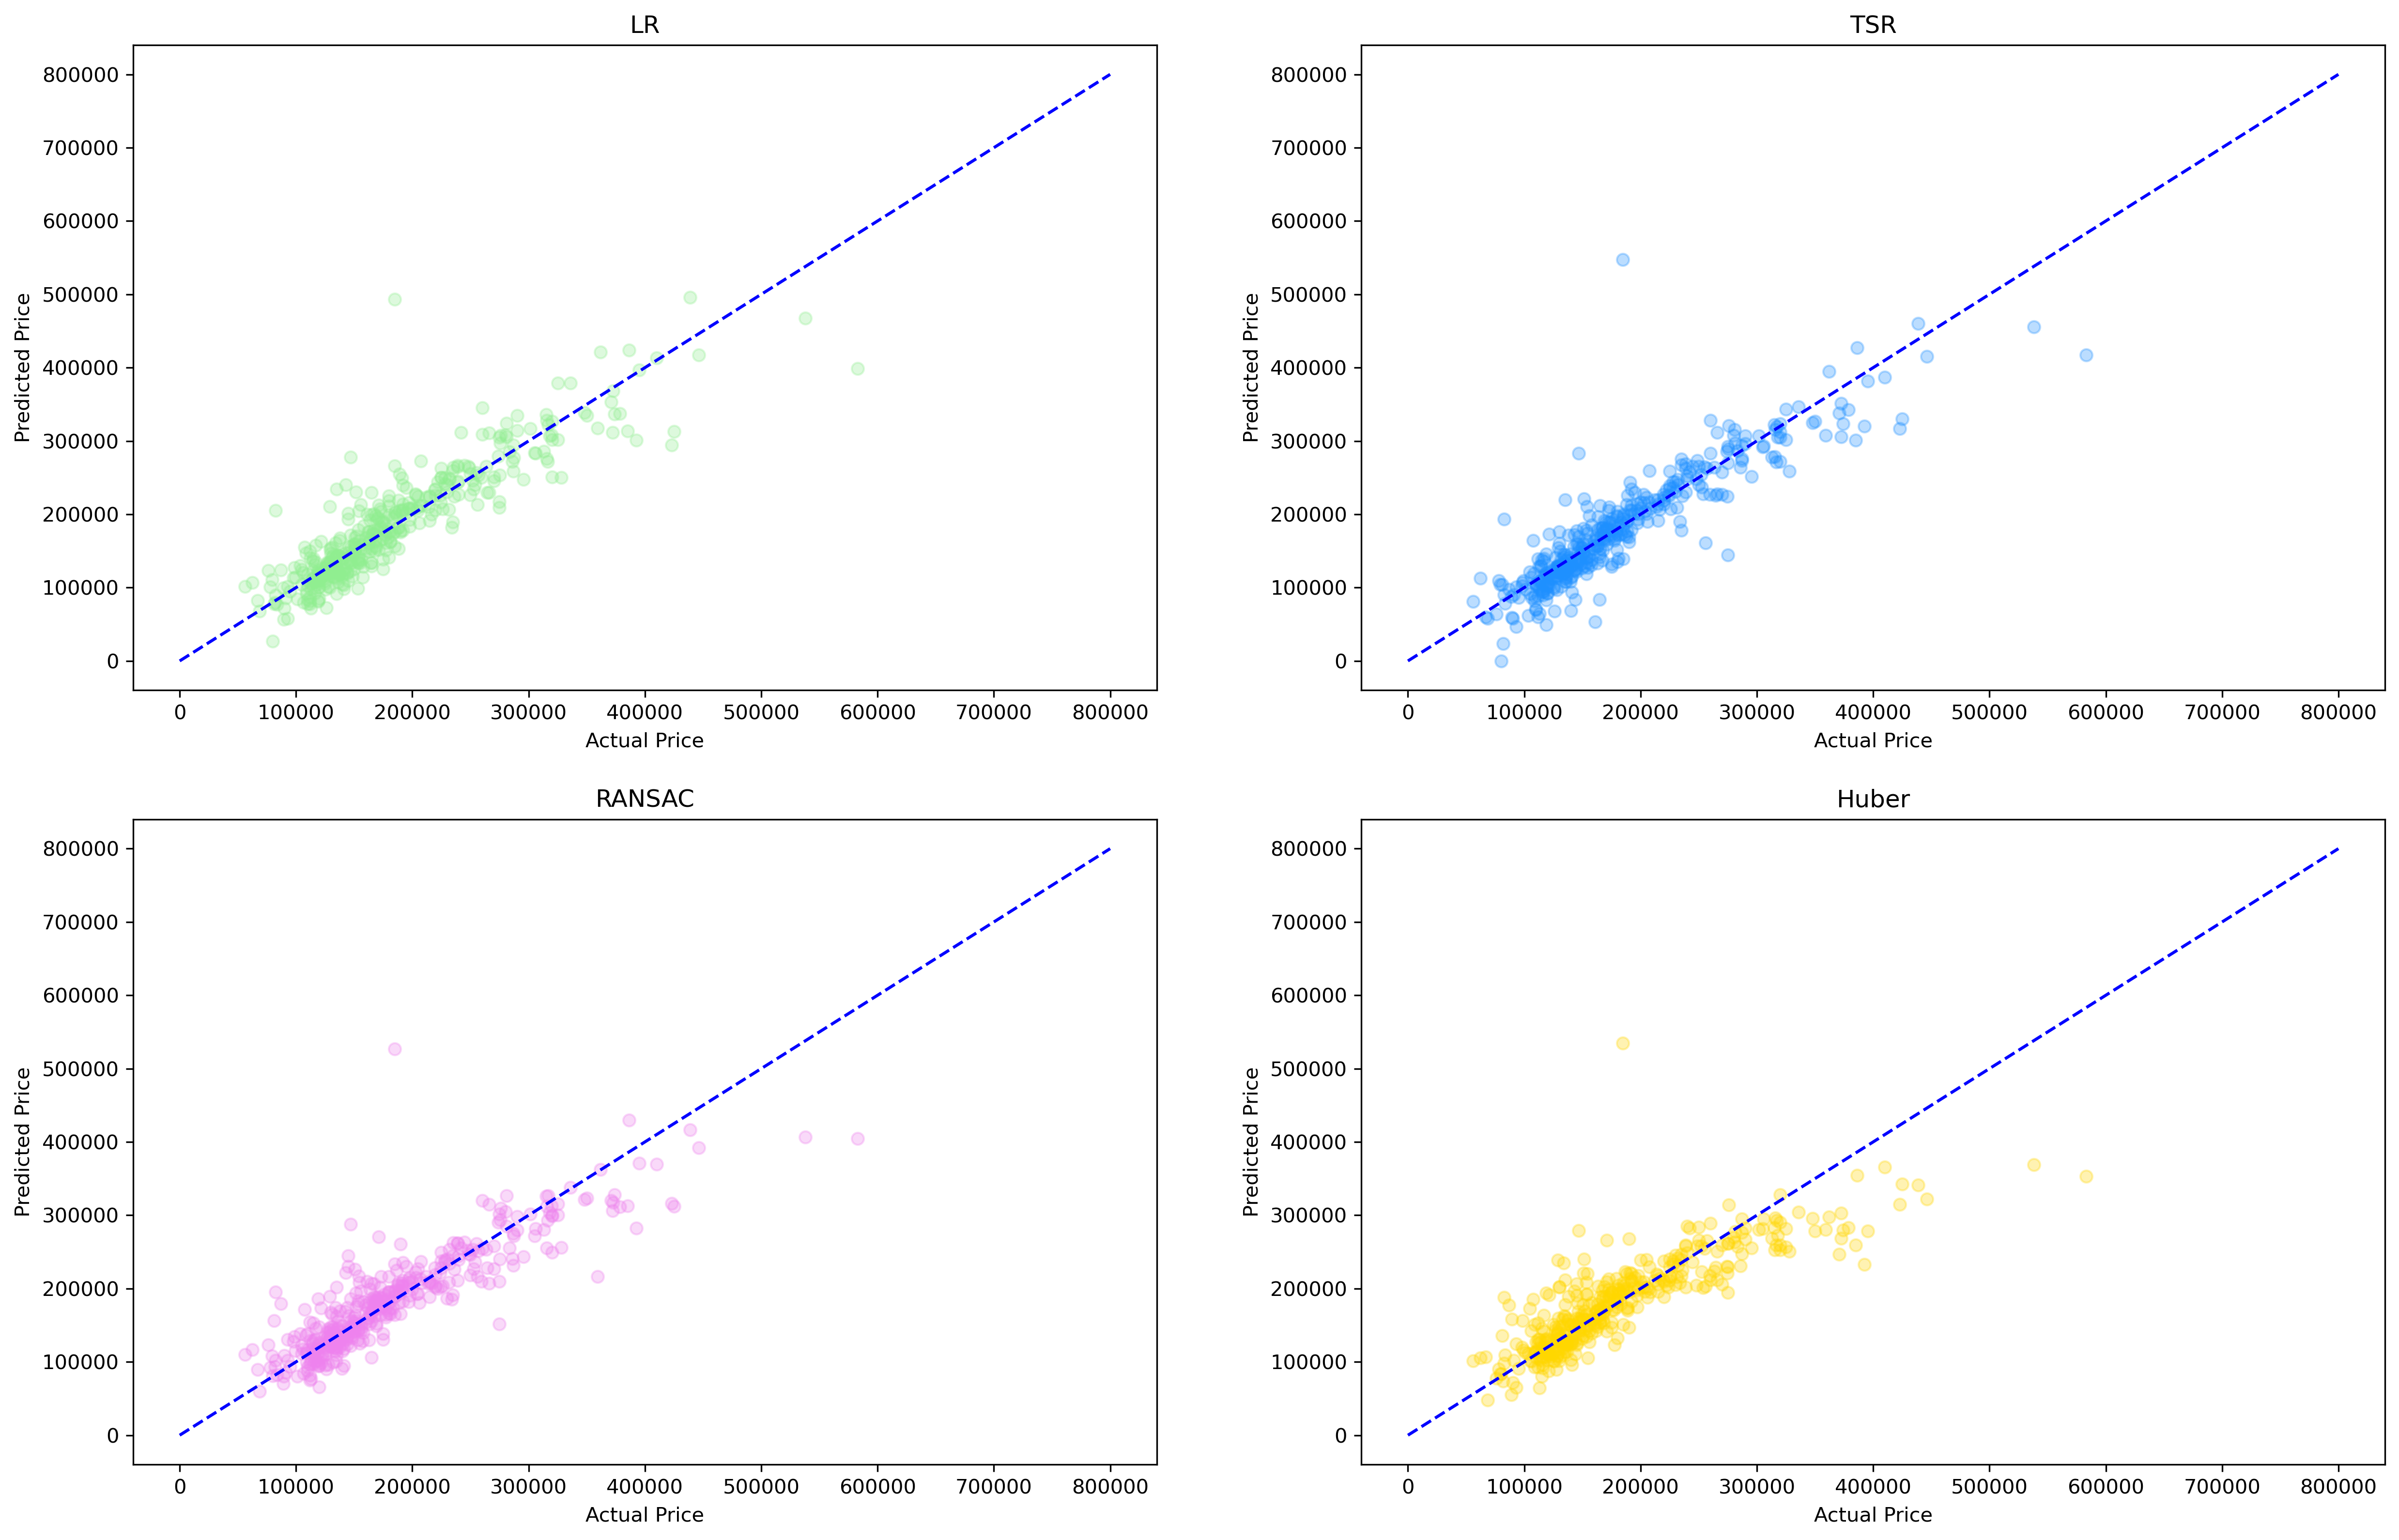

In [98]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax20 = plt.subplot(3, 2, 1)
plt.scatter('Y_test', 'Y_preds',data=df_lr, c='lightgreen', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LR')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--');

ax21 = plt.subplot(3, 2, 2)
plt.scatter('Y_test', 'Y_preds',data=df_TSR, c='dodgerblue', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('TSR')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 

ax10 = plt.subplot(3, 2, 3)
plt.scatter('Y_test', 'Y_preds',data=df_RANSAC, c='violet', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RANSAC')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 

ax11 = plt.subplot(3, 2, 4)
plt.scatter('Y_test', 'Y_preds',data=df_Huber, c='gold', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Huber')
plt.plot([0,800000], [0,800000], c='blue', linestyle='--'); 
plt.savefig('Plots_model2')

## Random Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
#From our previous work, our data is ready to be fitted

In [101]:
DTR = DecisionTreeRegressor(criterion='mse', max_depth=5)
DTR.fit(X_train, Y_train)
Y_preds_DTR = DTR.predict(X_test)

In [102]:
DTR_perf = pd.DataFrame({'Y_test': Y_test, 'Y_preds': Y_preds_DTR})
DTR_perf['Diff'] = DTR_perf['Y_preds'] - DTR_perf['Y_test']
DTR_perf['pct'] = ((DTR_perf['Y_preds'] - DTR_perf['Y_test'])/(DTR_perf['Y_test'])) * 100
DTR_perf.head(10)

Y_test        Y_preds          Diff        pct
640   274000  265027.114286  -8972.885714  -3.274776
931   117500  123627.553333   6127.553333   5.214939
676    87000  155280.120000  68280.120000  78.482897
452   204000  186048.430769 -17951.569231  -8.799789
958   185000  192635.872881   7635.872881   4.127499
1144   80000   97041.250000  17041.250000  21.301562
67    226000  192635.872881 -33364.127119 -14.762888
1429  182900  186048.430769   3148.430769   1.721395
508   161000  154356.965517  -6643.034483  -4.126108
69    225000  255964.523810  30964.523810  13.762011

In [103]:
print('DTR Metrics')
print("MAE: {:.2f}".format(mean_absolute_error(Y_test, Y_preds_DTR)))
print("MSE: {:.2f}".format(mean_squared_error(Y_test, Y_preds_DTR)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_preds_DTR))))
print("MedianAE: {:.2f}".format(median_absolute_error(Y_test, Y_preds_DTR)))
print("R2: {:.2f}".format(r2_score(Y_test, Y_preds_DTR)))

DTR Metrics
MAE: 24957.05
MSE: 1372285806.65
RMSE: 37044.38
MedianAE: 16738.11
R2: 0.77


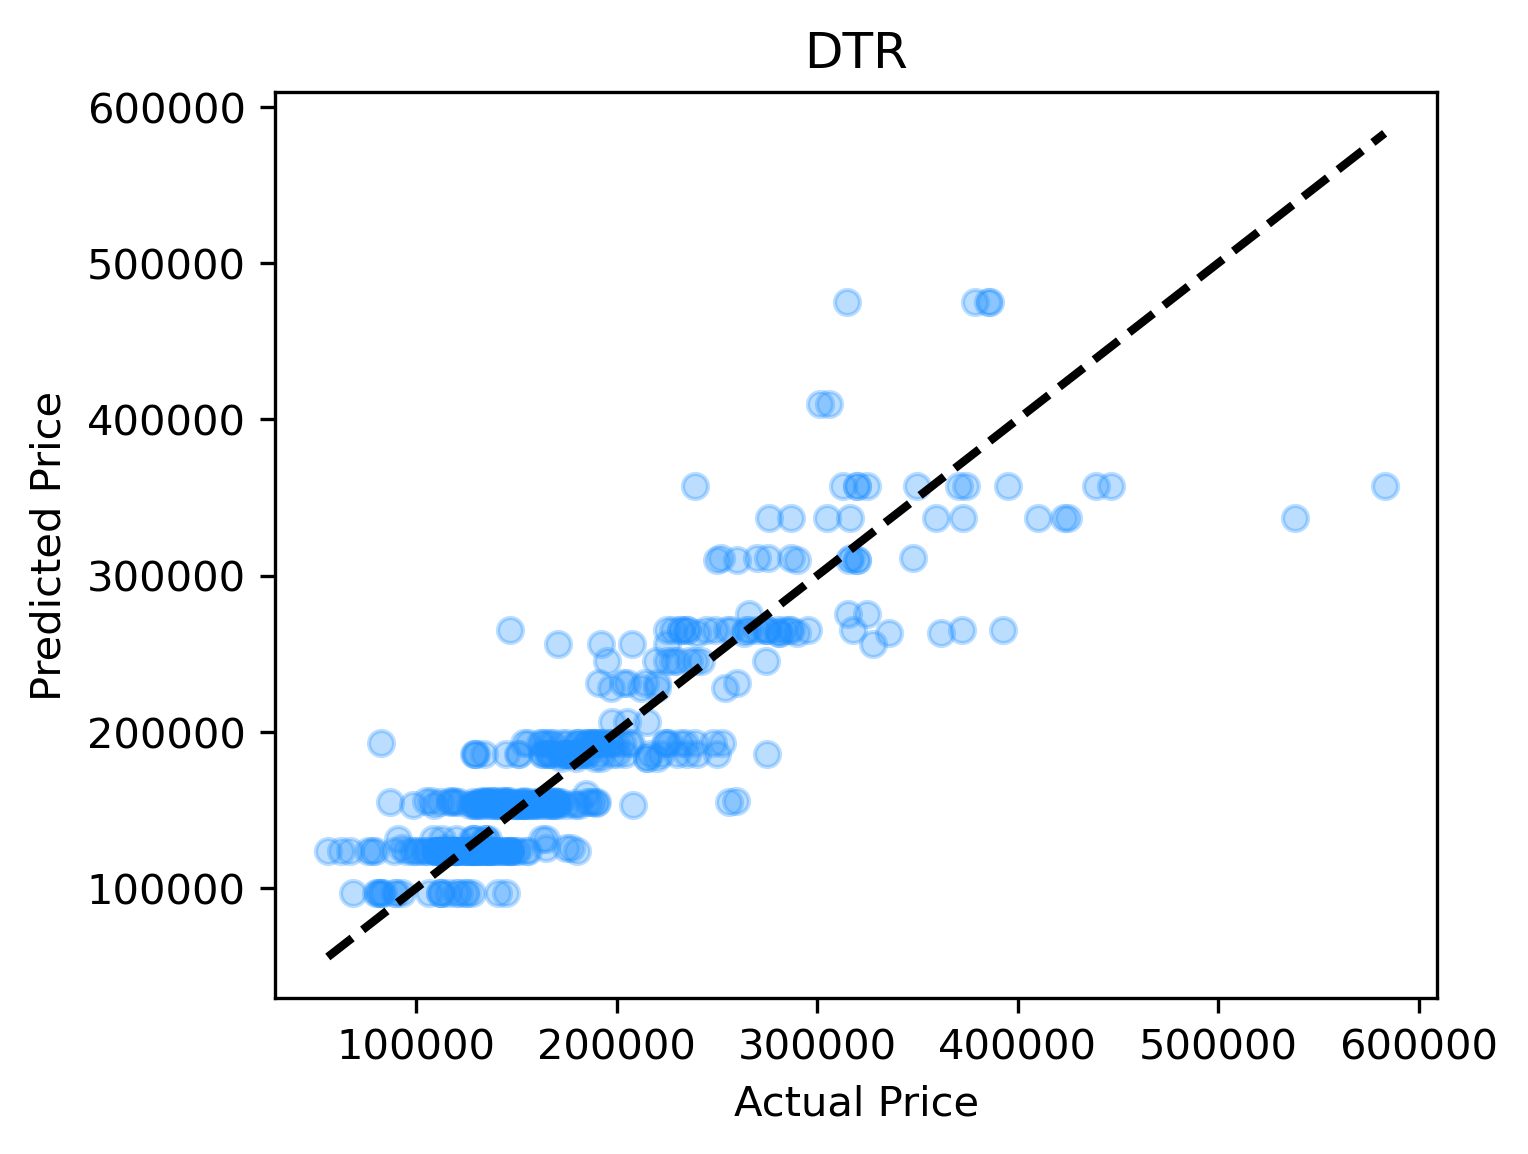

In [104]:
fig = plt.figure(figsize=(5,4), dpi=300)
plt.scatter('Y_test', 'Y_preds',data=DTR_perf, c='dodgerblue', alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('DTR')
#plt.plot([0,1000000], [0,1000000], c='blue', linestyle='--');
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2);
plt.savefig('DTR_PLOT')

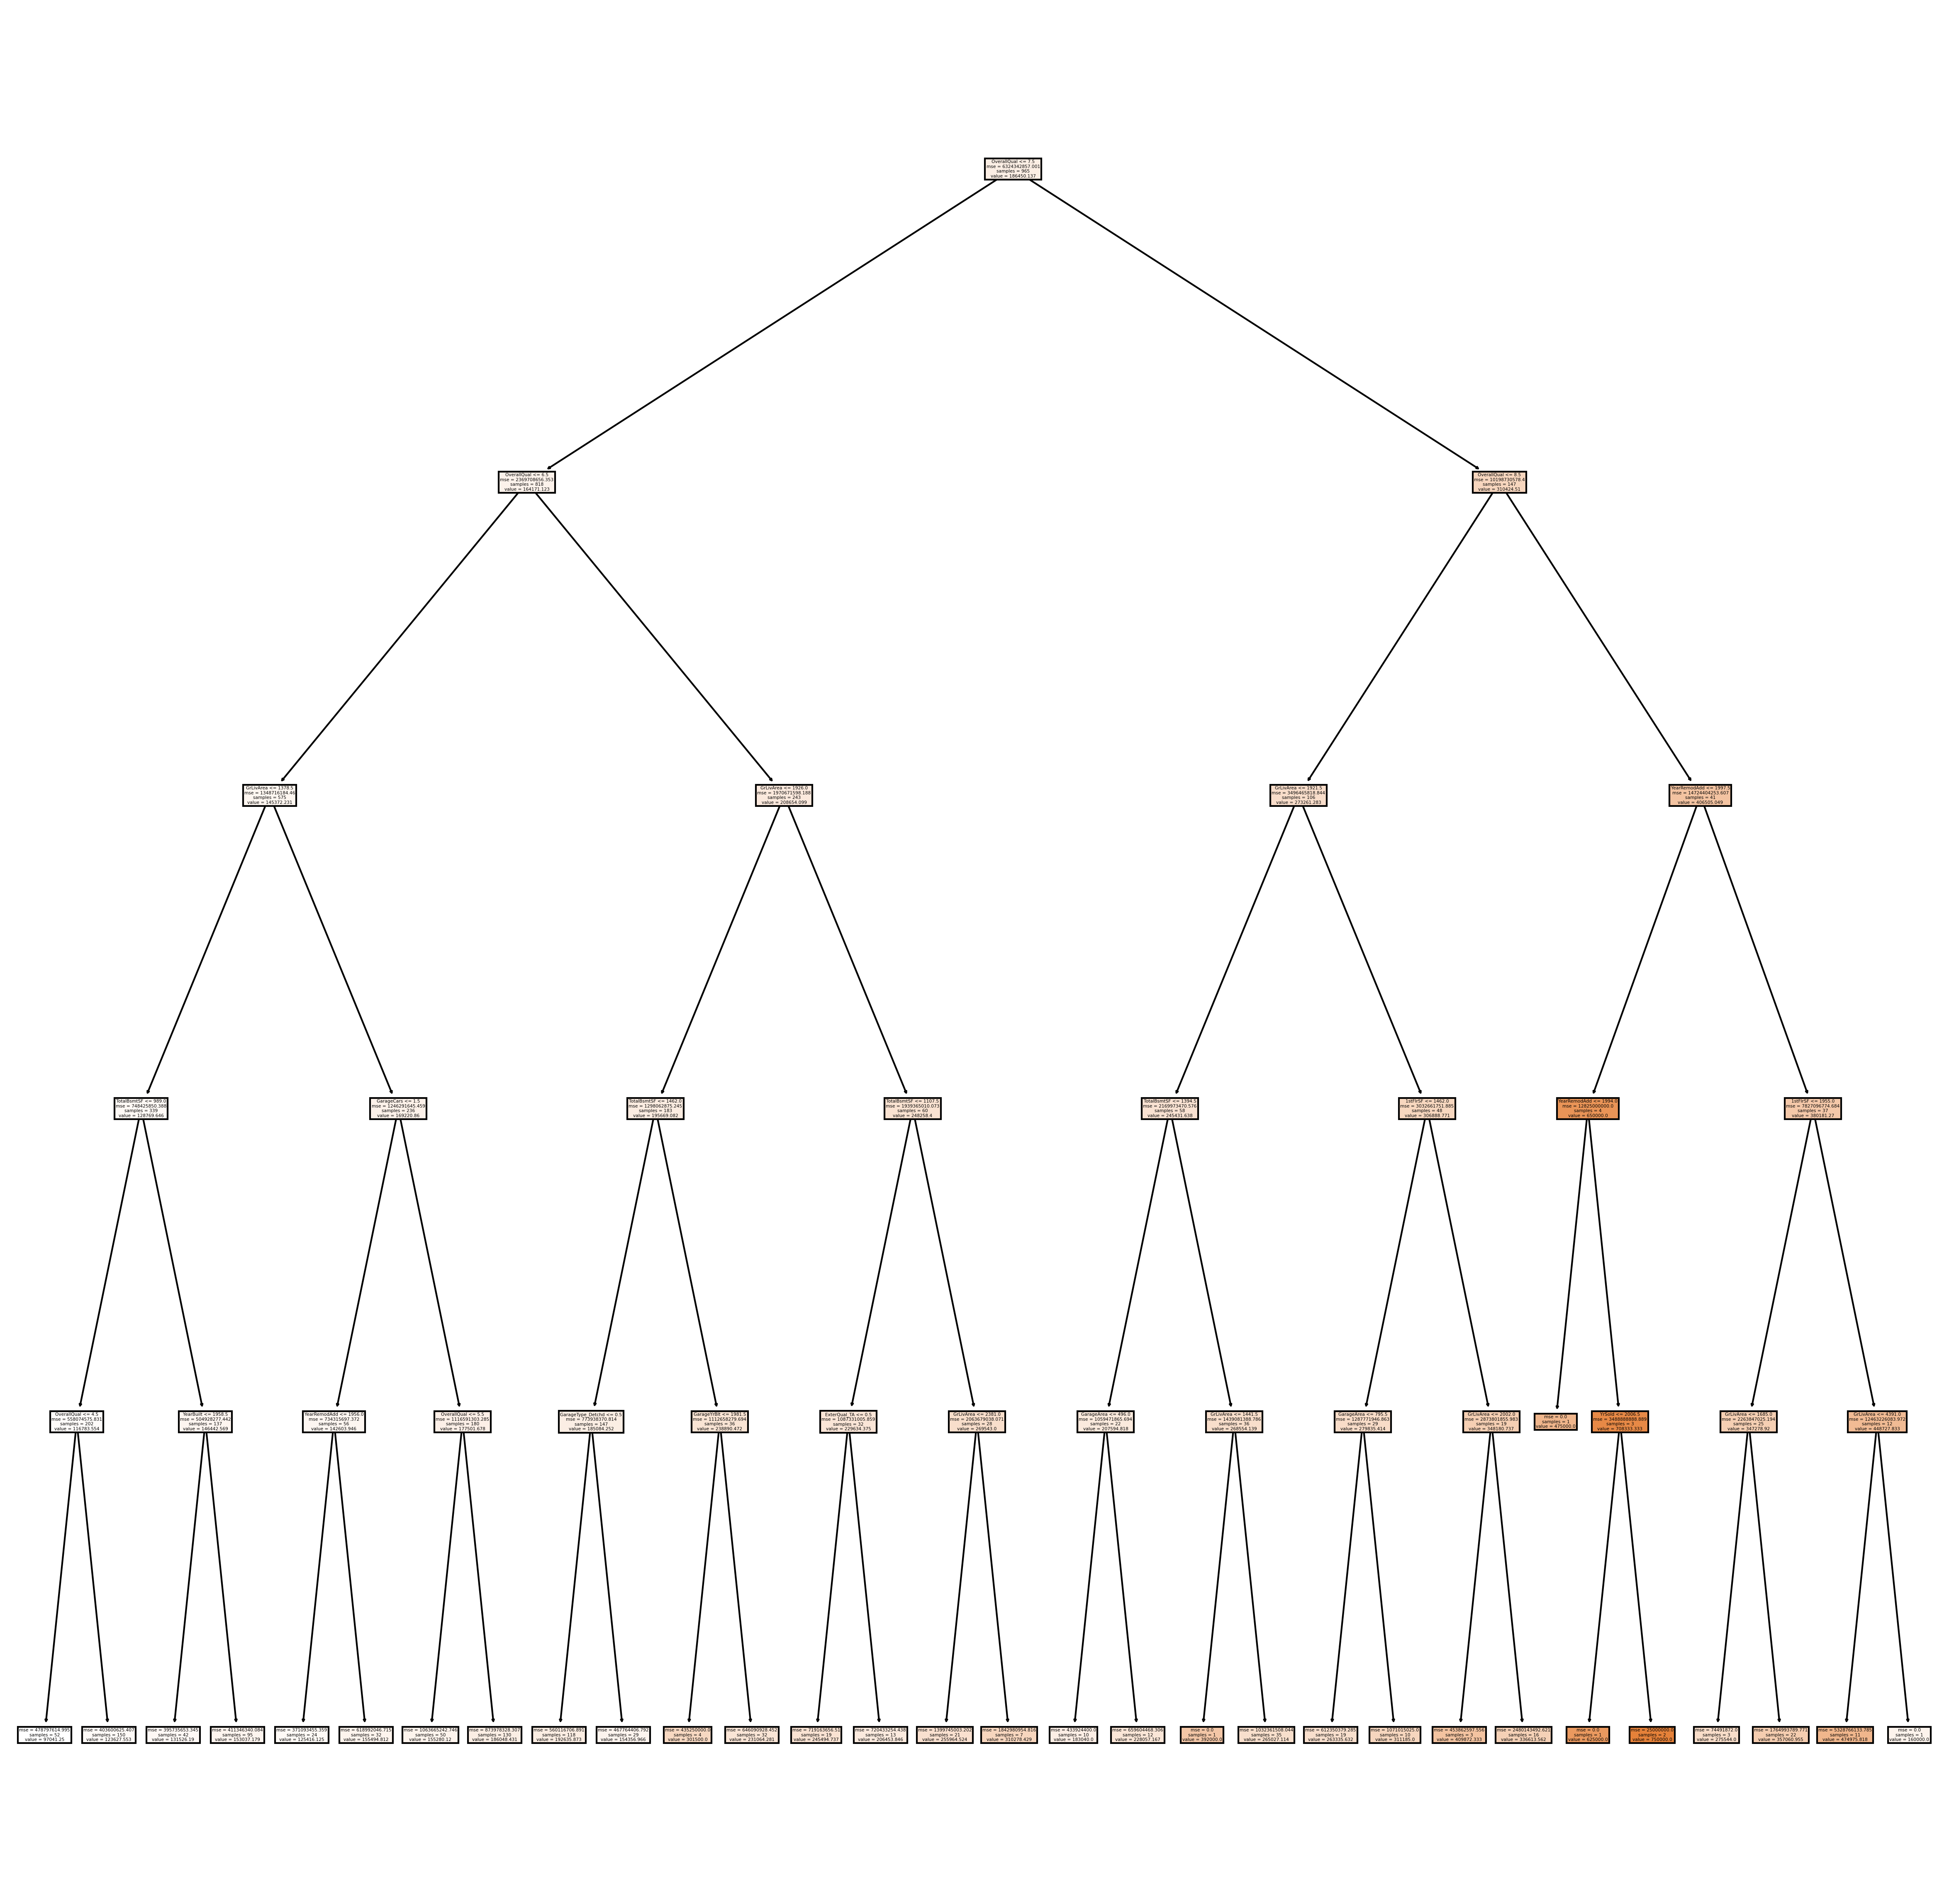

In [105]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(20,20),dpi = 300)
plot_tree(DTR, feature_names=X.columns, filled=True);
#plt.savefig('DTR')

#### DTR feature importance

In [106]:
#Code adopted from class material
features_df = pd.DataFrame({'Features': X.columns, 
                            'Importance Score': DTR.feature_importances_})

features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df
features_df[features_df['Importance Score'] > 0]

Features  Importance Score
0         OverallQual          0.730272
6           GrLivArea          0.112264
2        YearRemodAdd          0.058640
4         TotalBsmtSF          0.042687
5            1stFlrSF          0.025433
10         GarageCars          0.009652
24  GarageType_Detchd          0.006329
11         GarageArea          0.004834
9         GarageYrBlt          0.003273
1           YearBuilt          0.002501
60       ExterQual_TA          0.002183
12             YrSold          0.001933

# Conclusion

* When the models with only numric features, Linear Regression and RANSAC out performed TheilSen and Huber
* After including some categorical features, our models performed slightly better based on metrics.
* Here, TheiSen and Linear Regression out performed Huber and RANSAC
* Suprisingly, the Decision Tree regressor performed poorly when compared to the other models.
* A max depth of 6 was found to have the most optimal result.
* Also, based on 'feature importance metric', 'OverallQual' had the highest score of 0.73
* The rest had a significantly lower importance
* A possible approach to modeling this set would be to drop the extreme outliers and check how would that impact performance
* Also, increase the sample size